In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as sm
import scipy.stats as stats
#import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from datetime import datetime
from datetime import timedelta

In [122]:
#Loading the data


In [123]:
data_active_cust= pd.read_excel('Case_study_data.xlsx', sheetname=0)

In [124]:
data_churned_cust = pd.read_excel('Case_study_data.xlsx', sheetname=1)

In [125]:
data_active_cust.head(5)

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,UPGRADE_DATE,SERVICE_ PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-11112345,Active,2001-11-27,2003-12-14,NaN,HN9000,Vars,Indirect,UNKNOWN,HNS Customers,...,Broadband Remote,0,HN7000 Upgrade,2.0,1-5-1943,69,0,1.0,0.0,N
1,AMR-14837287,Active,2003-05-02,2006-08-08,Pro,HN7000S,Sales Agents,Indirect,NCC,HNS Customers,...,Spaceway,0,Retail,2.0,28-12-1969,43,4,1.0,0.0,N
2,AMR-14837803,Active,2001-01-28,2004-03-17,Power150,HN9000,Call Center,Indirect,NCC,HNS Customers,...,Broadband Remote,0,National Sales,2.0,20-7-1954,58,4,1.0,0.0,N
3,AMR-14837821,Active,2001-11-20,2005-03-27,Power150,DW6000,Sales Agents,Direct,NaN,HNS Customers,...,Spaceway,0,Direct,NaN,10-5-1990,22,6,1.0,1.0,NaN
4,AMR-14839297,Active,2002-02-27,2004-06-14,Home,HN7000S,Call Center,Indirect,TAG,HNS Customers,...,Broadband Remote,0,DW6000 Upgrade,1.0,11-5-1976,36,7,0.0,0.0,NaN


In [126]:
data_churned_cust.head(5)

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,CHURN_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-53205840,Closed,2002-01-18,2006-04-02,2004-01-03,Professional,DW6000,NaN,Indirect,Perfect 10,...,Broadband Remote,NaN,Dealer-Generated Sale,2.0,27-10-1964,48.0,0,.,NaN,N
1,AMR-53383136,Closed,2002-01-02,2006-07-09,2004-07-28,SO,DW6000,Retail/Others,Indirect,ValueElectronics,...,Broadband Remote,NaN,National Sales,NaN,22-10-1965,47.0,5,0,0.0,Y
2,AMR-53608585,Closed,2002-01-06,2008-12-30,2005-04-27,NaN,DW6000,Retail/Others,Indirect,TAG,...,Broadband Remote,NaN,Direct,2.0,20-3-1951,61.0,8,1,0.0,Y
3,AMR-53610590,Closed,2002-01-05,2004-08-19,NaT,SO,DW4000,NaN,Indirect,TAG,...,Broadband Remote,NaN,Direct,1.0,27-3-1948,64.0,0,.,NaN,Y
4,AMR-53612154,Closed,2002-01-05,2006-08-17,2005-11-12,Professional,DW7000,Retail/Others,Indirect,Perfect 10,...,Broadband Remote,NaN,Dealer-Generated Sale,1.0,25-8-1956,56.0,6,0,0.0,N


In [127]:
data_active_cust['CITY'].nunique()

828

In [128]:
print(data_active_cust.columns)
print(data_churned_cust.columns)

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_ PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')
Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'CHURN_DATE', 'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
   

In [129]:
#dropping SITE_ACCOUNT_NUMBER, FIRST_NAME, LAST_NAME,COMPANY_SOURCE_NAME  from above dfs.
data_active_cust.drop(['FIRST_NAME', 'LAST_NAME', 'COMPANY_SOURCE_NAME'], inplace=True, axis=1)
data_churned_cust.drop(['FIRST_NAME', 'LAST_NAME', 'COMPANY_SOURCE_NAME'], inplace=True, axis=1)
data_active_cust.head(5)

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,UPGRADE_DATE,SERVICE_ PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,ADDRESS,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-11112345,Active,2001-11-27,2003-12-14,NaN,HN9000,Vars,Indirect,UNKNOWN,TRIPLE CANTHOOK LN 0 0 0,...,Broadband Remote,0,HN7000 Upgrade,2.0,1-5-1943,69,0,1.0,0.0,N
1,AMR-14837287,Active,2003-05-02,2006-08-08,Pro,HN7000S,Sales Agents,Indirect,NCC,RR JOE 62 0 0 0,...,Spaceway,0,Retail,2.0,28-12-1969,43,4,1.0,0.0,N
2,AMR-14837803,Active,2001-01-28,2004-03-17,Power150,HN9000,Call Center,Indirect,NCC,69330 1 RD WAY 0 0,...,Broadband Remote,0,National Sales,2.0,20-7-1954,58,4,1.0,0.0,N
3,AMR-14837821,Active,2001-11-20,2005-03-27,Power150,DW6000,Sales Agents,Direct,NaN,PO ROCK ST 421 0 0,...,Spaceway,0,Direct,NaN,10-5-1990,22,6,1.0,1.0,NaN
4,AMR-14839297,Active,2002-02-27,2004-06-14,Home,HN7000S,Call Center,Indirect,TAG,626 NW RD 0 0 0,...,Broadband Remote,0,DW6000 Upgrade,1.0,11-5-1976,36,7,0.0,0.0,NaN


In [130]:
data_active_cust.drop(['EMAIL_ADDRESS'], inplace=True, axis=1)
data_churned_cust.drop(['EMAIL_ADDRESS'], inplace=True, axis=1)

In [131]:
data_churned_cust.head(5)

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,CHURN_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-53205840,Closed,2002-01-18,2006-04-02,2004-01-03,Professional,DW6000,NaN,Indirect,Perfect 10,...,Broadband Remote,NaN,Dealer-Generated Sale,2.0,27-10-1964,48.0,0,.,NaN,N
1,AMR-53383136,Closed,2002-01-02,2006-07-09,2004-07-28,SO,DW6000,Retail/Others,Indirect,ValueElectronics,...,Broadband Remote,NaN,National Sales,NaN,22-10-1965,47.0,5,0,0.0,Y
2,AMR-53608585,Closed,2002-01-06,2008-12-30,2005-04-27,NaN,DW6000,Retail/Others,Indirect,TAG,...,Broadband Remote,NaN,Direct,2.0,20-3-1951,61.0,8,1,0.0,Y
3,AMR-53610590,Closed,2002-01-05,2004-08-19,NaT,SO,DW4000,NaN,Indirect,TAG,...,Broadband Remote,NaN,Direct,1.0,27-3-1948,64.0,0,.,NaN,Y
4,AMR-53612154,Closed,2002-01-05,2006-08-17,2005-11-12,Professional,DW7000,Retail/Others,Indirect,Perfect 10,...,Broadband Remote,NaN,Dealer-Generated Sale,1.0,25-8-1956,56.0,6,0,0.0,N


In [132]:
data_churned_cust.drop(['CHURN_DATE'], inplace=True, axis=1)
print(data_churned_cust.columns)
print(data_active_cust.columns)

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'ADDRESS', 'CITY', 'STATE',
       'ZIPCODE', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME',
       'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER'],
      dtype='object')
Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_ PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'ADDRESS', 'CITY', 'STATE',
       'ZIPCODE', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME',
       'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER'],
      dtype='object')


In [133]:
#data_churned_cust['COMPANY_SOURCE_NAME'].unique()

In [134]:
#data_churned_cust.drop(['COMPANY_SOURCE_NAME','FIRST_NAME', 'LAST_NAME','EMAIL_ADDRESS'], axis=1, inplace=True)

In [135]:
#data_churned_cust.columns

In [136]:
print(data_active_cust['SITE_ACCOUNT_NUMBER'].nunique())
print(data_churned_cust['SITE_ACCOUNT_NUMBER'].nunique())

9998
10000


In [137]:
data_active_cust['CHURNED'] = 0
data_churned_cust['CHURNED'] = 1

In [138]:
data_active_cust.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_ PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'ADDRESS', 'CITY', 'STATE',
       'ZIPCODE', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME',
       'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER', 'CHURNED'],
      dtype='object')

In [139]:
data_active_cust.rename(columns= {'SERVICE_ PLAN' : 'SERVICE_PLAN'}, inplace=True)

In [140]:
data_churned_cust.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'ADDRESS', 'CITY', 'STATE',
       'ZIPCODE', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME',
       'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER', 'CHURNED'],
      dtype='object')

In [141]:
churn_data = data_churned_cust

In [142]:
churn_data.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'ADDRESS', 'CITY', 'STATE',
       'ZIPCODE', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME',
       'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER', 'CHURNED'],
      dtype='object')

In [143]:
#Creating a new dataframe containg active and churned cutsomers

In [144]:
churn_data.shape

(10000, 26)

In [145]:
data_cust = pd.concat([data_active_cust[:4999], churn_data[:4999]], axis=0)
data_cust_2 = pd.concat([data_active_cust[4999:], churn_data[4999:]], axis=0)

In [146]:
data_cust.tail(5)

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,ADDRESS,...,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,CHURNED
4994,AMR-93528330,Closed,2002-06-06,2003-02-07,NaN,HN7000S,Call Centers,Indirect,Communication Solutions LLC (CC),17711 Indigo Hills Drive,...,0,Direct,1.0,26-11-1976,36,7,0,0.0,Y,1
4995,AMR-93529250,Closed,2010-11-02,2011-04-21,Home,HN9000,Web Orders,Direct,Satex,381 Gish Rd,...,0,Hughes Sales Agents,1.0,4-5-1953,59,6,1,0.0,N,1
4996,AMR-93529260,Closed,2006-05-23,2007-10-24,Home,HN9000,Sales Agents,Indirect,Hughes Web Order,741 County Road 44850,...,EXPRESS REPAIR BASIC,Dealer-Generated Sale,1.0,19-7-1977,35,3,1,0.0,N,1
4997,AMR-93529347,Closed,2010-09-29,2011-03-22,Home,DW4000,NaN,Indirect,DialAmerica Marketing Inc (CC),312 E 2nd St,...,0,Hughes Sales Agents,1.0,3-6-1939,73,1,0,NaN,Y,1
4998,AMR-93529497,Closed,2006-03-25,2007-09-23,Elite,HN9000,NaN,Indirect,TAG,1509 County Road 222,...,0,Direct,1.0,20-9-1962,50,7,1,1.0,Y,1


In [147]:
data_cust.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'ADDRESS', 'CITY', 'STATE',
       'ZIPCODE', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME',
       'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER', 'CHURNED'],
      dtype='object')

In [148]:
data_cust.to_csv("data_cust3.csv")

In [149]:
data_cust.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'ADDRESS', 'CITY', 'STATE',
       'ZIPCODE', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME',
       'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER', 'CHURNED'],
      dtype='object')

In [150]:
# Now data_cust is the dataframe to work upon

In [151]:
data_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 4998
Data columns (total 26 columns):
SITE_ACCOUNT_NUMBER          9998 non-null object
ACCOUNT_STATUS               9990 non-null object
FIRST_COMMUNICATION_DATE     9992 non-null datetime64[ns]
UPGRADE_DATE                 9889 non-null datetime64[ns]
SERVICE_PLAN                 8397 non-null object
MODEL                        9362 non-null object
SALES_CHANNEL                7278 non-null object
DIRECT_INDIRECT_CHANNEL      9557 non-null object
SALES_SOURCE                 9501 non-null object
ADDRESS                      9970 non-null object
CITY                         9998 non-null object
STATE                        9962 non-null object
ZIPCODE                      9962 non-null object
FEEDBACK                     8069 non-null object
SATELLITE                    9254 non-null object
SITE_TYPE_DESC               9959 non-null object
WARRANTY_NAME                9350 non-null object
MOST_RECENT_SALES_CHANNEL  

In [152]:
cat_list = []
num_list = []

for variable in data_cust.columns:
    if data_cust[variable].dtype.name in ['object']:
        cat_list.append(variable)
    else:
        num_list.append(variable)
        
print(cat_list)
print("/n")
print(num_list)

['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'DATE_OF_BIRTH', 'AGE', 'INCOME', 'MARITAL_STATUS', 'COMPUTER_OWNER']
/n
['FIRST_COMMUNICATION_DATE', 'UPGRADE_DATE', 'GENDER', 'PRESENCE_OF_CHILDREN', 'CHURNED']


In [153]:
data_cust.apply(lambda x: x.isnull().sum(), axis=0)

SITE_ACCOUNT_NUMBER             0
ACCOUNT_STATUS                  8
FIRST_COMMUNICATION_DATE        6
UPGRADE_DATE                  109
SERVICE_PLAN                 1601
MODEL                         636
SALES_CHANNEL                2720
DIRECT_INDIRECT_CHANNEL       441
SALES_SOURCE                  497
ADDRESS                        28
CITY                            0
STATE                          36
ZIPCODE                        36
FEEDBACK                     1929
SATELLITE                     744
SITE_TYPE_DESC                 39
WARRANTY_NAME                 648
MOST_RECENT_SALES_CHANNEL      12
GENDER                       1253
DATE_OF_BIRTH                   4
AGE                             4
INCOME                        152
MARITAL_STATUS                286
PRESENCE_OF_CHILDREN         1187
COMPUTER_OWNER               2974
CHURNED                         0
dtype: int64

In [154]:
data_cust.apply(lambda x: x.nunique(), axis=0)

SITE_ACCOUNT_NUMBER          9998
ACCOUNT_STATUS                  3
FIRST_COMMUNICATION_DATE      460
UPGRADE_DATE                 2366
SERVICE_PLAN                   11
MODEL                           7
SALES_CHANNEL                   8
DIRECT_INDIRECT_CHANNEL         3
SALES_SOURCE                  149
ADDRESS                      5951
CITY                          826
STATE                          47
ZIPCODE                       893
FEEDBACK                        2
SATELLITE                      45
SITE_TYPE_DESC                  2
WARRANTY_NAME                  12
MOST_RECENT_SALES_CHANNEL      21
GENDER                          2
DATE_OF_BIRTH                7474
AGE                            68
INCOME                         14
MARITAL_STATUS                  4
PRESENCE_OF_CHILDREN            2
COMPUTER_OWNER                  2
CHURNED                         2
dtype: int64

In [155]:
data_cust.drop(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'CITY', 'STATE'], axis=1, inplace=True)

In [156]:
data_cust_2.drop(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'CITY', 'STATE'], axis=1, inplace=True)

In [157]:
data_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 4998
Data columns (total 22 columns):
FIRST_COMMUNICATION_DATE     9992 non-null datetime64[ns]
UPGRADE_DATE                 9889 non-null datetime64[ns]
SERVICE_PLAN                 8397 non-null object
MODEL                        9362 non-null object
SALES_CHANNEL                7278 non-null object
DIRECT_INDIRECT_CHANNEL      9557 non-null object
SALES_SOURCE                 9501 non-null object
ADDRESS                      9970 non-null object
ZIPCODE                      9962 non-null object
FEEDBACK                     8069 non-null object
SATELLITE                    9254 non-null object
SITE_TYPE_DESC               9959 non-null object
WARRANTY_NAME                9350 non-null object
MOST_RECENT_SALES_CHANNEL    9986 non-null object
GENDER                       8745 non-null float64
DATE_OF_BIRTH                9994 non-null object
AGE                          9994 non-null object
INCOME                    

In [158]:
data_cust.drop(['DATE_OF_BIRTH'], axis=1, inplace=True)
data_cust_2.drop(['DATE_OF_BIRTH'], axis=1, inplace=True)

In [159]:
data_cust.drop(['ADDRESS'], axis=1, inplace=True)
data_cust_2.drop(['ADDRESS'], axis=1, inplace=True)

In [160]:
cat_list = []
num_list = []

for variable in data_cust.columns:
    if data_cust[variable].dtype.name in ['object']:
        cat_list.append(variable)
    else:
        num_list.append(variable)
        
print(cat_list)
print("/n")
print(num_list)

['SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'ZIPCODE', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'AGE', 'INCOME', 'MARITAL_STATUS', 'COMPUTER_OWNER']
/n
['FIRST_COMMUNICATION_DATE', 'UPGRADE_DATE', 'GENDER', 'PRESENCE_OF_CHILDREN', 'CHURNED']


In [161]:
data_cust['GENDER'] = data_cust['GENDER'].fillna('Missing')
data_cust_2['GENDER'] = data_cust_2['GENDER'].fillna('Missing')

In [162]:
data_cust['AGE'].unique()

array([69, 43, 58, 22, 36, 51, 56, 57, 42, 34, 54, 52, 39, 24, 45, '.', 62,
       64, 30, 68, 63, 33, 23, 50, 28, 29, 31, 38, 35, 41, 74, 32, 66, 46,
       48, 47, 25, 26, 61, 40, 37, 55, 71, 65, 76, 49, 44, 27, 75, 53, 72,
       59, 70, 73, 60, 67, 78, 84, 80, 86, 82, 92, 90.0, 81.0, 83.0, 79.0,
       89.0, 77.0, nan], dtype=object)

In [163]:
data_cust['PRESENCE_OF_CHILDREN'] = data_cust['PRESENCE_OF_CHILDREN'].fillna('Missing')
data_cust_2['PRESENCE_OF_CHILDREN'] = data_cust_2['PRESENCE_OF_CHILDREN'].fillna('Missing')

In [164]:
data_cust['AGE'] = data_cust['AGE'].fillna(0)
data_cust_2['AGE'] = data_cust_2['AGE'].fillna(0)

In [165]:
data_cust['AGE'].unique()

array([69, 43, 58, 22, 36, 51, 56, 57, 42, 34, 54, 52, 39, 24, 45, '.', 62,
       64, 30, 68, 63, 33, 23, 50, 28, 29, 31, 38, 35, 41, 74, 32, 66, 46,
       48, 47, 25, 26, 61, 40, 37, 55, 71, 65, 76, 49, 44, 27, 75, 53, 72,
       59, 70, 73, 60, 67, 78, 84, 80, 86, 82, 92, 90.0, 81.0, 83.0, 79.0,
       89.0, 77.0, 0], dtype=object)

In [166]:
data_cust[data_cust['AGE'] == '.']['AGE'].head(5)

16     .
24     .
87     .
169    .
180    .
Name: AGE, dtype: object

In [167]:
#data_cust['AGE'] = data_cust['AGE'].map({'.': 0})

In [168]:
data_cust['AGE'] = data_cust['AGE'].replace('.', 0)
data_cust_2['AGE'] = data_cust_2['AGE'].replace('.', 0)

In [169]:
data_cust['AGE']  = data_cust['AGE'].astype('int64')
data_cust_2['AGE']  = data_cust_2['AGE'].astype('int64')
data_cust['AGE'].head(5)

0    69
1    43
2    58
3    22
4    36
Name: AGE, dtype: int64

In [170]:
data_cust_2['AGE'].head(5)

4999    30
5000    66
5001    25
5002    25
5003    55
Name: AGE, dtype: int64

In [171]:
cat_list = []
num_list = []

for variable in data_cust.columns:
    if data_cust[variable].dtype.name in ['object']:
        cat_list.append(variable)
    else:
        num_list.append(variable)
        
print(cat_list)
print("/n")
print(num_list)

['SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'ZIPCODE', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER']
/n
['FIRST_COMMUNICATION_DATE', 'UPGRADE_DATE', 'AGE', 'CHURNED']


In [182]:
null_index = list(data_cust[data_cust['INCOME'].isnull()].index)
null_index_2 = list(data_cust_2[data_cust_2['INCOME'].isnull()].index)

In [184]:
data_cust.drop(null_index, inplace=True, axis=0)
data_cust_2.drop(null_index_2, inplace=True, axis=0)

In [185]:
data_cust['INCOME'] = data_cust['INCOME'].replace('A', 11)
data_cust['INCOME'] = data_cust['INCOME'].replace('B', 12)
data_cust['INCOME'] = data_cust['INCOME'].replace('C', 13)
data_cust['INCOME'] = data_cust['INCOME'].replace('D', 14)

data_cust_2['INCOME'] = data_cust_2['INCOME'].replace('A', 11)
data_cust_2['INCOME'] = data_cust_2['INCOME'].replace('B', 12)
data_cust_2['INCOME'] = data_cust_2['INCOME'].replace('C', 13)
data_cust_2['INCOME'] = data_cust_2['INCOME'].replace('D', 14)


#data_cust['INCOME'] = data_cust['INCOME'].map({'A': 11 ,'B' : 12 , 'C' : 13 ,'D' : 14})
data_cust['INCOME'] = pd.to_numeric(data_cust['INCOME'])
data_cust_2['INCOME'] = pd.to_numeric(data_cust_2['INCOME'])

#mean_income = data_cust[data_cust['INCOME'] != 'NaN']['INCOME'].mean()

In [186]:
print(data_cust['INCOME'].unique())
print(data_cust_2['INCOME'].unique())

[ 0  4  6  7  3 11  5 13  9 14  1  8  2 12]
[ 0  7  4  6  9  3  5  8 14  1  2 12 11 13]


In [187]:
cat_list = []
num_list = []

for variable in data_cust.columns:
    if data_cust[variable].dtype.name in ['object']:
        cat_list.append(variable)
    else:
        num_list.append(variable)
        
print(cat_list)
print("/n")
print(num_list)

['SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'ZIPCODE', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER']
/n
['FIRST_COMMUNICATION_DATE', 'UPGRADE_DATE', 'AGE', 'INCOME', 'CHURNED']


In [188]:
data_cust['PRESENCE_OF_CHILDREN'] = data_cust['PRESENCE_OF_CHILDREN'].map({'0': 'Single' ,'1' : 'Married' , '2' : 'Divorced'})

In [189]:
data_cust_2['PRESENCE_OF_CHILDREN'] = data_cust_2['PRESENCE_OF_CHILDREN'].map({'0': 'Single' ,'1' : 'Married' , '2' : 'Divorced'})

In [190]:
data_cust['CHURNED'] = data_cust['CHURNED'].astype('str').astype('object')
data_cust_2['CHURNED'] = data_cust_2['CHURNED'].astype('str').astype('object')

In [191]:
cat_list = []
num_list = []

for variable in data_cust.columns:
    if data_cust[variable].dtype.name in ['object']:
        cat_list.append(variable)
    else:
        num_list.append(variable)
        
print(cat_list)
print("/n")
print(num_list)

['SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'ZIPCODE', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER', 'CHURNED']
/n
['FIRST_COMMUNICATION_DATE', 'UPGRADE_DATE', 'AGE', 'INCOME']


# Missing Value Treatment

In [192]:
data_cust_2.columns

Index(['FIRST_COMMUNICATION_DATE', 'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL',
       'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'ZIPCODE',
       'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME',
       'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER', 'CHURNED'],
      dtype='object')

In [193]:
data_cust[cat_list] = data_cust[cat_list].fillna('Missing')
data_cust_2[cat_list] = data_cust_2[cat_list].fillna('Missing')

In [194]:
data_cust['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'] = data_cust['UPGRADE_DATE'] - data_cust['FIRST_COMMUNICATION_DATE']
data_cust['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'] = data_cust['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'].apply(lambda x: x.days/365)

data_cust_2['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'] = data_cust_2['UPGRADE_DATE'] - data_cust_2['FIRST_COMMUNICATION_DATE']
data_cust_2['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'] = data_cust_2['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'].apply(lambda x: x.days/365)

In [243]:
data_cust_2['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'].unique()

array([ 4.02465753,  2.12876712,  3.84109589, ...,  1.09863014,
        0.82465753,  1.27945205])

In [269]:
data_cust['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'].unique()

array([ 2.04657534,  3.27123288,  3.13424658, ...,  1.18630137,
        1.31506849,  1.3260274 ])

In [270]:
cat_list = []
num_list = []

for variable in data_cust.columns:
    if data_cust[variable].dtype.name in ['object']:
        cat_list.append(variable)
    else:
        num_list.append(variable)
        
print(cat_list)
print("/n")
print(num_list)

['SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'ZIPCODE', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER']
/n
['AGE', 'INCOME', 'CHURNED', 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE']


In [271]:
data_cust.drop(['FIRST_COMMUNICATION_DATE', 'UPGRADE_DATE'], axis=1, inplace=True)
data_cust_2.drop(['FIRST_COMMUNICATION_DATE', 'UPGRADE_DATE'], axis=1, inplace=True)

ValueError: labels ['FIRST_COMMUNICATION_DATE' 'UPGRADE_DATE'] not contained in axis

In [272]:
cat_list = []
num_list = []

for variable in data_cust.columns:
    if data_cust[variable].dtype.name in ['object']:
        cat_list.append(variable)
    else:
        num_list.append(variable)
        
print(cat_list)
print("/n")
print(num_list)

['SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'ZIPCODE', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER']
/n
['AGE', 'INCOME', 'CHURNED', 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE']


In [273]:
data_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9476 entries, 0 to 9475
Data columns (total 19 columns):
SERVICE_PLAN                                9476 non-null object
MODEL                                       9476 non-null object
SALES_CHANNEL                               9476 non-null object
DIRECT_INDIRECT_CHANNEL                     9476 non-null object
SALES_SOURCE                                9476 non-null object
ZIPCODE                                     9476 non-null object
FEEDBACK                                    9476 non-null object
SATELLITE                                   9476 non-null object
SITE_TYPE_DESC                              9476 non-null object
WARRANTY_NAME                               9476 non-null object
MOST_RECENT_SALES_CHANNEL                   9476 non-null object
GENDER                                      9476 non-null object
AGE                                         9476 non-null float64
INCOME                                      947

In [274]:
print(data_cust['AGE'].min())
print(data_cust_2['AGE'].min())
print(data_cust['AGE'].max())
print(data_cust_2['AGE'].max())

22.0
22.0
92.0
90.0


In [275]:
zero_count = data_cust[data_cust['AGE'] == 0]['AGE'].count()
age_count = data_cust['AGE'].count()
print(zero_count)
print(age_count)

non_zero_count = age_count - zero_count

mean_age = (data_cust['AGE'].sum())/(non_zero_count)
print(mean_age)
#data_cust['AGE'] = data_cust['AGE'].map({0 : mean_age})

0
9476
46.7524271845


In [276]:
data_cust['AGE'] = data_cust['AGE'].replace(0, mean_age)
data_cust['AGE'].unique()

array([ 69.,  43.,  58.,  36.,  56.,  57.,  42.,  54.,  30.,  50.,  28.,
        31.,  38.,  66.,  23.,  41.,  52.,  25.,  22.,  46.,  29.,  71.,
        35.,  26.,  48.,  40.,  44.,  62.,  49.,  74.,  34.,  32.,  27.,
        39.,  64.,  55.,  47.,  33.,  75.,  65.,  61.,  24.,  53.,  72.,
        51.,  45.,  59.,  63.,  37.,  70.,  76.,  73.,  68.,  60.,  67.,
        78.,  84.,  80.,  86.,  82.,  92.,  90.,  81.,  83.,  79.,  89.,
        77.])

In [277]:
data_cust_2['AGE'] = data_cust_2['AGE'].replace(0, mean_age)

In [278]:
data_cust['AGE'] = data_cust['AGE'].astype('int64')
data_cust_2['AGE'] = data_cust_2['AGE'].astype('int64')

In [279]:
data_cust['AGE'].unique()

array([69, 43, 58, 36, 56, 57, 42, 54, 30, 50, 28, 31, 38, 66, 23, 41, 52,
       25, 22, 46, 29, 71, 35, 26, 48, 40, 44, 62, 49, 74, 34, 32, 27, 39,
       64, 55, 47, 33, 75, 65, 61, 24, 53, 72, 51, 45, 59, 63, 37, 70, 76,
       73, 68, 60, 67, 78, 84, 80, 86, 82, 92, 90, 81, 83, 79, 89, 77], dtype=int64)

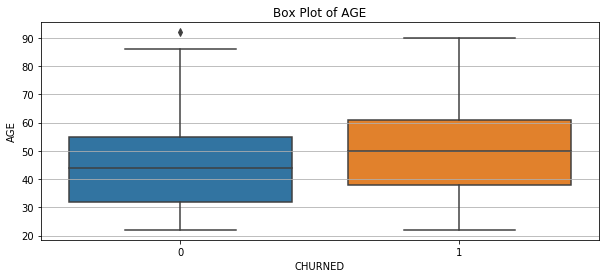

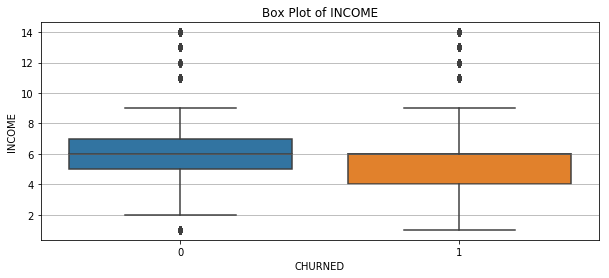

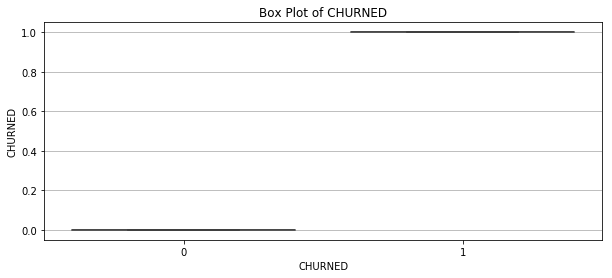

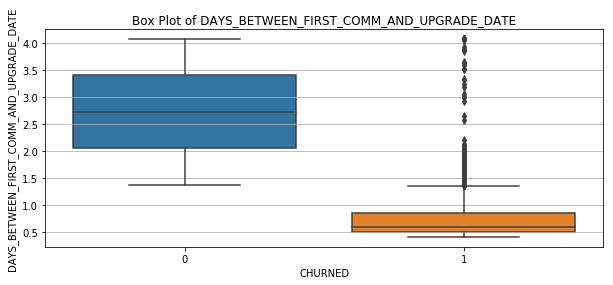

In [280]:
from matplotlib.backends.backend_pdf import PdfPages

bp = PdfPages('BoxPlots with Churn Split.pdf')

for num_variable in num_list:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(x='CHURNED', y=num_variable, data = data_cust)
    plt.title(str('Box Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()


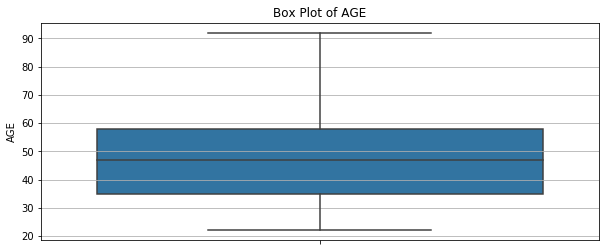

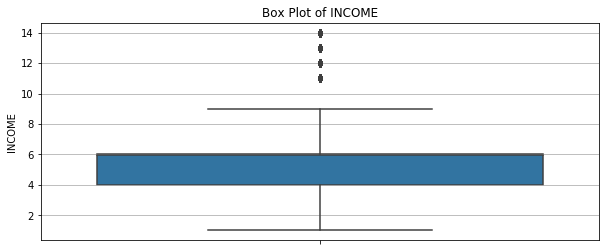

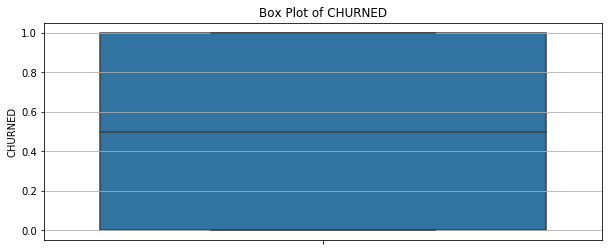

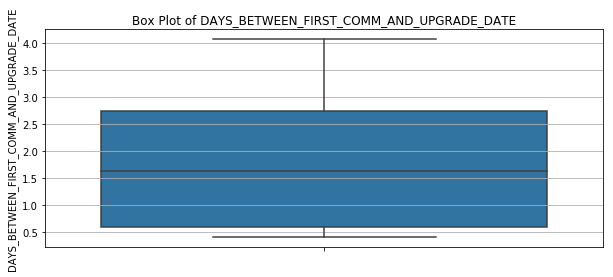

In [281]:
bp = PdfPages('BoxPlots with Total View.pdf')

for num_variable in num_list:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(y=num_variable, data = data_cust)
    plt.title(str('Box Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()

In [282]:
data_cust['INCOME'].unique()

array([  5.98452184,   4.        ,   7.        ,   3.        ,
        13.        ,   5.        ,   6.        ,   1.        ,
         9.        ,  14.        ,   2.        ,   8.        ,
        11.        ,  12.        ])

In [283]:
data_cust['INCOME'].dtype

dtype('float64')

In [284]:
zero_count = data_cust[data_cust['INCOME'] == 0]['INCOME'].count()
income_count = data_cust['INCOME'].count()
print(zero_count)
print(age_count)

non_zero_count = income_count - zero_count

mean_income = (data_cust['INCOME'].sum())/(non_zero_count)
print(mean_income)

0
9476
5.98418926194


In [285]:
data_cust['INCOME'] = data_cust['INCOME'].replace(0 , mean_income)

In [286]:
age_count_2 = data_cust_2['AGE'].count()
zero_count_2 = data_cust_2[data_cust_2['INCOME'] == 0]['INCOME'].count()
income_count_2 = data_cust_2['INCOME'].count()
print(zero_count_2)
print(age_count_2)

non_zero_count_2 = income_count_2 - zero_count_2

mean_income_2 = (data_cust_2['INCOME'].sum())/(non_zero_count_2)
print(mean_income_2)

0
8135
4.92251341235


In [287]:
data_cust_2['AGE']= data_cust_2['AGE'].replace(0, mean_income_2)

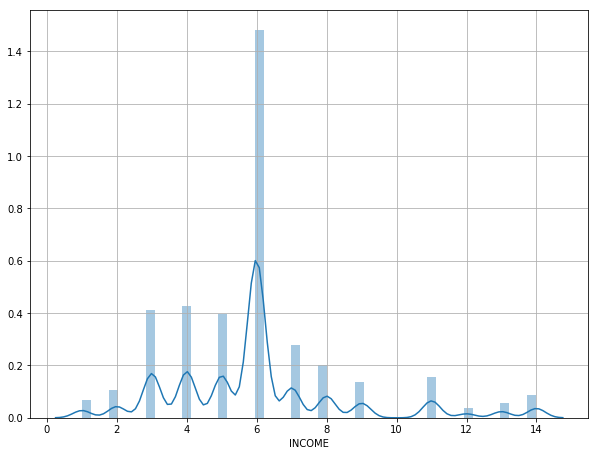

In [288]:
sns.distplot(data_cust['INCOME'])

In [289]:
data_cust['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'] = data_cust['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'].fillna(0)
zero_count = data_cust[data_cust['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'] == 0]['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'].count()
days_count = data_cust['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'].count()
print(zero_count)
print(days_count)

non_zero_count = days_count - zero_count

mean_days = (data_cust['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'].sum())/(non_zero_count)
print(mean_days)

0
9476
1.76324152726


In [290]:
data_cust_2['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'] = data_cust_2['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'].fillna(0)
zero_count_2 = data_cust_2[data_cust_2['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'] == 0]['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'].count()
days_count_2 = data_cust_2['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'].count()
print(zero_count_2)
print(days_count_2)

non_zero_count_2 = days_count_2 - zero_count_2

mean_days_2 = (data_cust_2['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'].sum())/(non_zero_count_2)
print(mean_days_2)

0
8135
1.75317981662


In [291]:
data_cust['INCOME'] = data_cust['INCOME'].replace(0, mean_days)
data_cust_2['INCOME'] = data_cust_2['INCOME'].replace(0, mean_days_2)

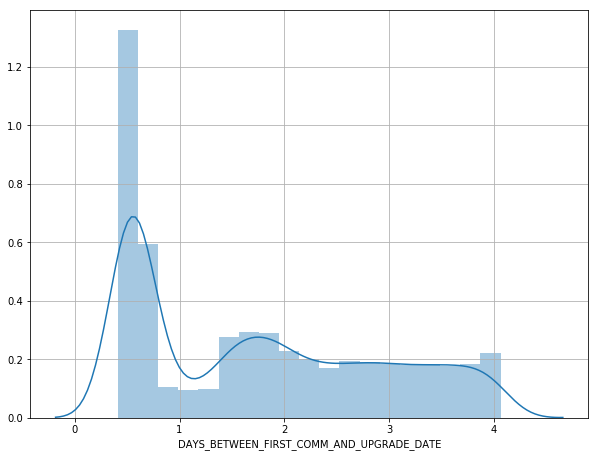

In [292]:
sns.distplot(data_cust['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'])

In [293]:
data_cust['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'] = data_cust['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'].clip_upper(data_cust['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'].quantile(0.99))

In [294]:
data_cust['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'] = data_cust['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'].clip_lower(data_cust['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'].quantile(0.01))

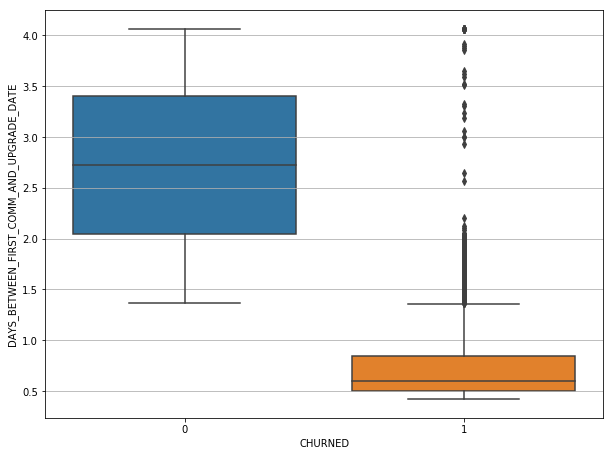

In [295]:
sns.boxplot(y='DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE', x='CHURNED', data=data_cust)

# Data Exploratory Analysis

In [296]:
num_list

['AGE', 'INCOME', 'CHURNED', 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE']

In [297]:
cat_list

['SERVICE_PLAN',
 'MODEL',
 'SALES_CHANNEL',
 'DIRECT_INDIRECT_CHANNEL',
 'SALES_SOURCE',
 'ZIPCODE',
 'FEEDBACK',
 'SATELLITE',
 'SITE_TYPE_DESC',
 'WARRANTY_NAME',
 'MOST_RECENT_SALES_CHANNEL',
 'GENDER',
 'MARITAL_STATUS',
 'PRESENCE_OF_CHILDREN',
 'COMPUTER_OWNER']

In [298]:
#Removing variable 'CHURNED' from cat_list
cat_list = ['SERVICE_PLAN',
 'MODEL',
 'SALES_CHANNEL',
 'DIRECT_INDIRECT_CHANNEL',
 'SALES_SOURCE',
 'ZIPCODE',
 'FEEDBACK',
 'SATELLITE',
 'SITE_TYPE_DESC',
 'WARRANTY_NAME',
 'MOST_RECENT_SALES_CHANNEL',
 'GENDER',
 'MARITAL_STATUS',
 'PRESENCE_OF_CHILDREN',
 'COMPUTER_OWNER']

In [299]:
#data_cust.apply(lambda x: x.isnull().sum(), axis=0)

In [485]:
stats.chi2_contingency?

In [300]:
## Categorical Variable
chisq_df = pd.DataFrame()
for cat_variable in cat_list:
    cross_tab = pd.crosstab(data_cust[cat_variable],data_cust['CHURNED'], margins=False)
    print(cross_tab.head(5))
    stats.chi2_contingency(observed=cross_tab)[1]
    temp = pd.DataFrame([cat_variable,stats.chi2_contingency(observed=cross_tab)[0],stats.chi2_contingency(observed=cross_tab)[1] ]).T
    temp.columns = ['Variable', 'ChiSquare','P-Value']
    chisq_df = pd.concat([chisq_df, temp], axis=0, ignore_index=True)
    
print(chisq_df, '\n')

## Numerical Variable
tstats_df = pd.DataFrame()
for num_variable in num_list:
    print(num_variable)
    #a = data_cust[data_cust['CHURNED']==1][num_variable]
    #print(a.shape)
    #b = data_cust[data_cust['CHURNED']==0][num_variable]
    #print(b.shape)
    tstats = stats.ttest_ind(data_cust[data_cust['CHURNED']=='1'][num_variable],data_cust[data_cust['CHURNED']=='0'][num_variable])
    temp = pd.DataFrame([num_variable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)

print(tstats_df)

CHURNED         0    1
SERVICE_PLAN          
Basic         618  232
Basic_Ltd     595  250
Elite         605  813
Home          547  465
Missing       606  917
CHURNED     0    1
MODEL             
DW4000    291  820
DW4020    273    0
DW6000    240  728
DW7000    105  726
HN7000S  2078  885
CHURNED           0     1
SALES_CHANNEL            
Call Center     634     0
Call Centers      0   737
Missing        1385  1166
Retail/Others     0   830
Retail/others   702     0
CHURNED                     0     1
DIRECT_INDIRECT_CHANNEL            
0                           3     0
Direct                   1109  1309
Indirect                 3604  3035
Missing                    22   394
CHURNED                0    1
SALES_SOURCE                 
0                      3    0
4 Peaks (RSI561307)    0    3
A & A LLC (SA)         0    7
ACS                  201  170
ACS Pre-Install      133   83
CHURNED  0  1
ZIPCODE      
623      4  9
1005     5  0
1259     4  3
1541     6  3
1886     5  5


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [301]:
#Base on above p-values, variables 'PRESENCE_OF_CHILDREN' and 'INCOME' seem to be non-significant. Hence dropping these columns

In [302]:
#data_cust.drop(['PRESENCE_OF_CHILDREN', 'INCOME'], axis=1, inplace=True)

In [303]:
data_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9476 entries, 0 to 9475
Data columns (total 19 columns):
SERVICE_PLAN                                9476 non-null object
MODEL                                       9476 non-null object
SALES_CHANNEL                               9476 non-null object
DIRECT_INDIRECT_CHANNEL                     9476 non-null object
SALES_SOURCE                                9476 non-null object
ZIPCODE                                     9476 non-null object
FEEDBACK                                    9476 non-null object
SATELLITE                                   9476 non-null object
SITE_TYPE_DESC                              9476 non-null object
WARRANTY_NAME                               9476 non-null object
MOST_RECENT_SALES_CHANNEL                   9476 non-null object
GENDER                                      9476 non-null object
AGE                                         9476 non-null int64
INCOME                                      9476 

In [304]:
#print(num_list)
#print(cat_list)

num_list = ['AGE', 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE']
cat_list = ['SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'ZIPCODE', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'MARITAL_STATUS','COMPUTER_OWNER']

In [305]:
data_cust[data_cust['AGE'] == 0]['AGE']

Series([], Name: AGE, dtype: int64)

In [306]:
index_list = list(data_cust[data_cust['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'] == 0].index)
index_list_2 = list(data_cust_2[data_cust_2['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'] == 0].index)

In [307]:
data_cust_2[data_cust_2['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'] == 0]['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'].sum()

0

In [308]:
print(len(index_list))
print(len(index_list_2))

0
0


In [309]:
#data_cust.shape
data_cust.drop(index_list, axis=0, inplace=True)
data_cust.reset_index(drop= True, inplace=True)

data_cust_2.drop(index_list_2, axis=0, inplace=True)
data_cust_2.reset_index(drop= True, inplace=True)

In [310]:
data_cust['AGE'] = data_cust['AGE'].astype('float64')
data_cust_2['AGE'] = data_cust_2['AGE'].astype('float64')
data_cust.info()
#data_cust.loc[11]['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE']
#list(data_cust[data_cust['AGE'] == 0].index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9476 entries, 0 to 9475
Data columns (total 19 columns):
SERVICE_PLAN                                9476 non-null object
MODEL                                       9476 non-null object
SALES_CHANNEL                               9476 non-null object
DIRECT_INDIRECT_CHANNEL                     9476 non-null object
SALES_SOURCE                                9476 non-null object
ZIPCODE                                     9476 non-null object
FEEDBACK                                    9476 non-null object
SATELLITE                                   9476 non-null object
SITE_TYPE_DESC                              9476 non-null object
WARRANTY_NAME                               9476 non-null object
MOST_RECENT_SALES_CHANNEL                   9476 non-null object
GENDER                                      9476 non-null object
AGE                                         9476 non-null float64
INCOME                                      947

In [311]:
#Visualization of vars

In [312]:
data_cust.shape

(9476, 19)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

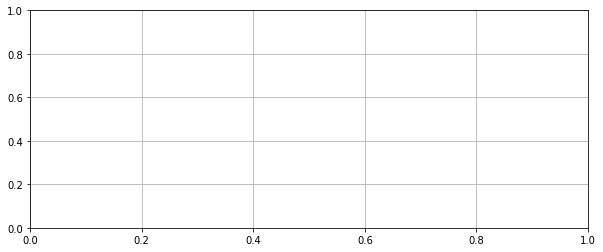

In [313]:
#bp = PdfPages('Density Plots with Churn.pdf')
bp = PdfPages('Density Plots with Churn Split.pdf')

for num_variable in num_list:
    fig,axes = plt.subplots(figsize=(10,4))
    #sns.distplot(data_cust[num_variable], kde=False, color='g', hist=True)
    sns.distplot(data_cust[data_cust['CHURNED']=='0'][num_variable], label='Not Churned', color='g', hist=True, norm_hist=False)
    sns.distplot(data_cust[data_cust['CHURNED']=='1'][num_variable], label='Churned', color='r', hist=True, norm_hist=False)
    plt.xlabel(str("X variable ") + str(num_variable) )
    plt.ylabel('Density Function')
    #plt.title(str('Churn Density Plot of ')+str(num_variable))
    plt.title(str('Churn Split Density Plot of ')+str(num_variable))
    plt.legend()
    bp.savefig(fig)

bp.close()

In [314]:
data_cust[cat_list].dtypes

SERVICE_PLAN                 object
MODEL                        object
SALES_CHANNEL                object
DIRECT_INDIRECT_CHANNEL      object
SALES_SOURCE                 object
ZIPCODE                      object
FEEDBACK                     object
SATELLITE                    object
SITE_TYPE_DESC               object
WARRANTY_NAME                object
MOST_RECENT_SALES_CHANNEL    object
GENDER                       object
MARITAL_STATUS               object
COMPUTER_OWNER               object
dtype: object

In [315]:
#data_cust[cat_list].head(5)

In [316]:
data_cust['CHURNED'] = data_cust['CHURNED'].astype('str').astype('int64')

In [317]:
data_cust['WARRANTY_NAME'] = data_cust['WARRANTY_NAME'].replace(0,'0')
data_cust['WARRANTY_NAME'].unique()

array(['0', 'EXPRESS REPAIR HOME WITH TERM', 'Missing',
       'EXPRESS REPAIR BASIC',
       'EXPRESS REPAIR HOME WITH COMMITMENT WITH TERM',
       'SRVC ASSUR STD NEW CUST', 'EXPRESS REPAIR BUSINESS WITH TERM',
       'EXPRESS REPAIR HOME W/O COMMITMENT WITH TERM',
       'SRVC ASSUR STD EXISTING CUST NO COMMIT', 'EXPRESS REPAIR HOME',
       'Spaceway', 'SRVC ASSUR PLUS NEW CUST', 'Broadband Remote'], dtype=object)

In [318]:
data_cust_2['WARRANTY_NAME'] = data_cust_2['WARRANTY_NAME'].replace(0,'0')
data_cust_2['WARRANTY_NAME'].unique()

array(['0', 'EXPRESS REPAIR HOME WITH COMMITMENT WITH TERM', 'Missing',
       'EXPRESS REPAIR HOME WITH TERM', 'EXPRESS REPAIR HOME',
       'SRVC ASSUR STD EXISTING CUST NO COMMIT',
       'EXPRESS REPAIR HOME W/O COMMITMENT WITH TERM',
       'EXPRESS REPAIR BUSINESS WITH TERM', 'EXPRESS REPAIR BASIC',
       'SRVC ASSUR STD NEW CUST', 'Broadband Remote',
       'SRVC ASSUR PLUS NEW CUST', 'Spaceway'], dtype=object)

In [319]:
#sns.barplot(x='WARRANTY_NAME',y='CHURNED',data=data_cust) 

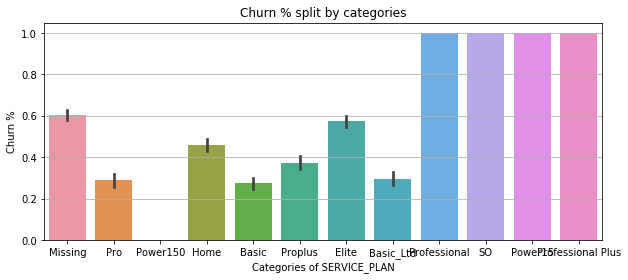

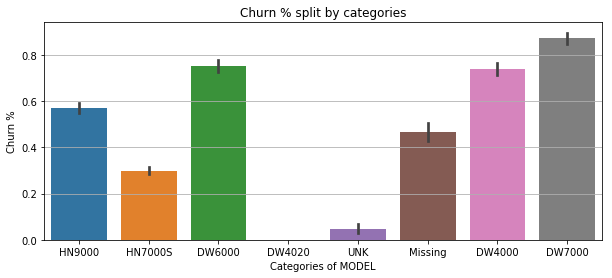

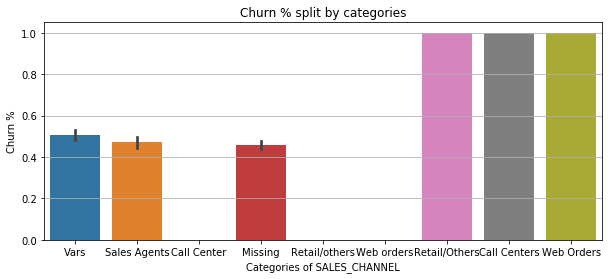

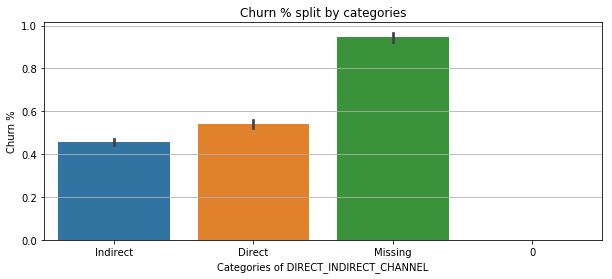

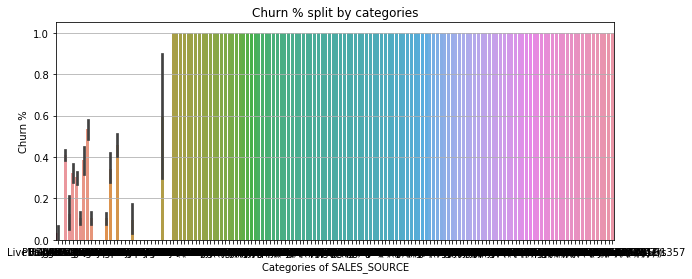

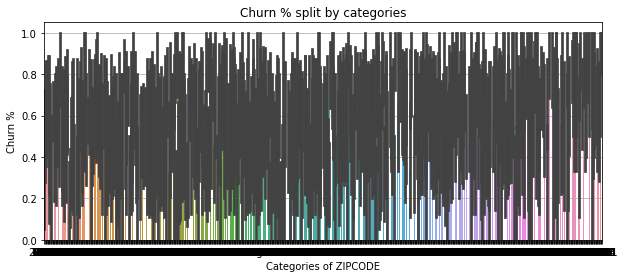

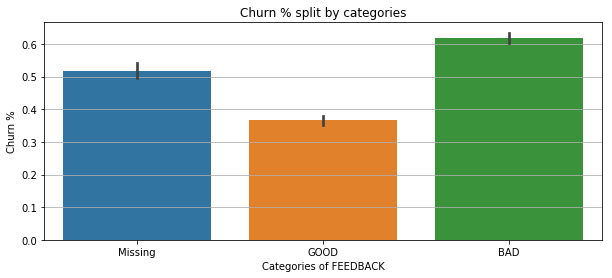

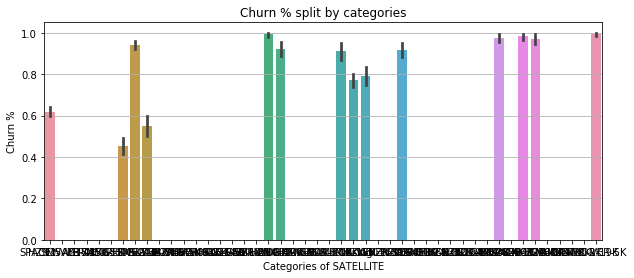

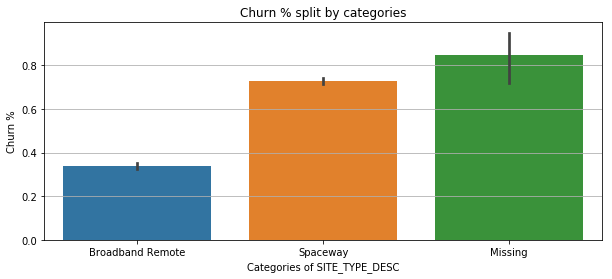

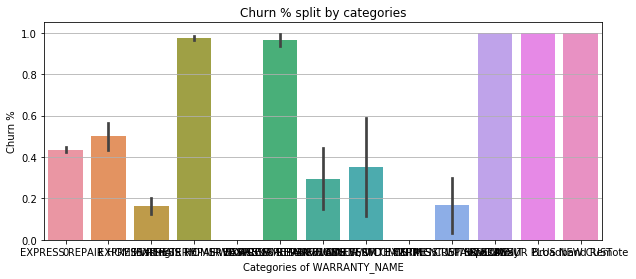

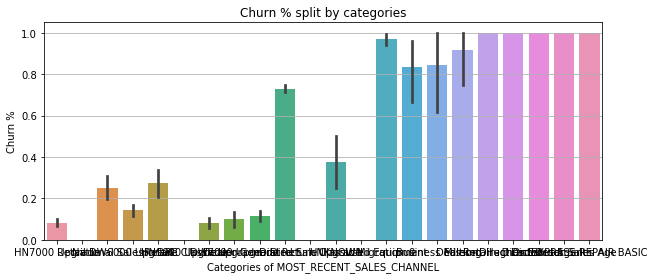

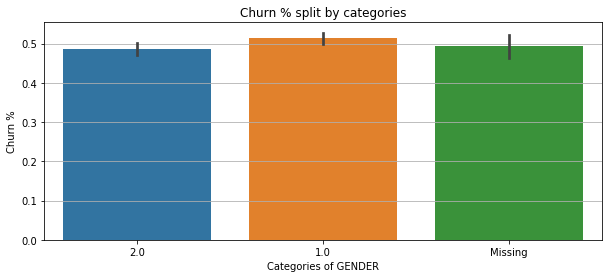

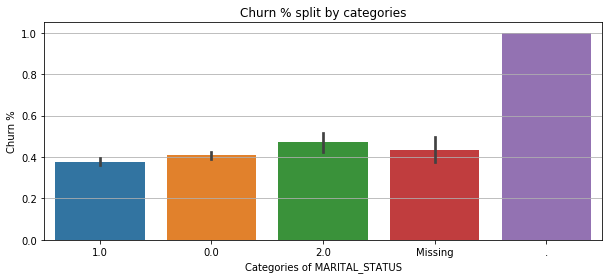

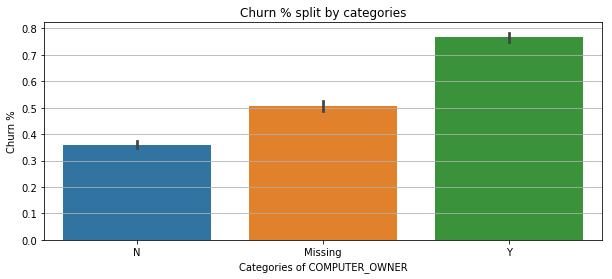

In [320]:
bp = PdfPages('Churn Plots by Categorical Variable.pdf')

for cat_variable in cat_list:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=cat_variable,y='CHURNED',data=data_cust) 
    plt.ylabel('Churn %')
    plt.xlabel(str('Categories of ') + str(cat_variable))
    plt.title('Churn % split by categories')
    bp.savefig(fig)

bp.close()

In [321]:
#Variable Transformation

In [322]:
data_cust['CHURNED'].value_counts()

1    4738
0    4738
Name: CHURNED, dtype: int64

In [323]:
data_cust_2['CHURNED'].value_counts()

1    4068
0    4067
Name: CHURNED, dtype: int64

In [324]:
num_list

['AGE', 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE']

In [325]:
# 4 transformations = X, X_squared, X_sqrt, X_ln
data_cust_transform = data_cust[num_list].copy()
squared = (data_cust_transform**2).add_suffix("_squared")
square_root = (data_cust_transform**0.5).add_suffix("_sqrt")
natural_log = np.log(data_cust_transform+1).add_suffix("_ln")
data_cust_transform = pd.concat([data_cust_transform, squared, square_root, natural_log], axis=1)
data_cust_transform.head()

,AGE,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,AGE_squared,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE_squared,AGE_sqrt,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE_sqrt,AGE_ln,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE_ln
0,69.0,2.046575,4761.0,4.188471,8.306624,1.430586,4.248495,1.114018
1,43.0,3.271233,1849.0,10.700965,6.557439,1.808655,3.784190,1.451903
2,58.0,3.134247,3364.0,9.823502,7.615773,1.770380,4.077537,1.419305
3,36.0,2.295890,1296.0,5.271113,6.000000,1.515220,3.610918,1.192676
4,56.0,1.536986,3136.0,2.362327,7.483315,1.239753,4.043051,0.930977


In [326]:
data_cust_transform['CHURNED'] = data_cust['CHURNED']

In [327]:
data_cust_transform.head(5)

,AGE,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,AGE_squared,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE_squared,AGE_sqrt,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE_sqrt,AGE_ln,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE_ln,CHURNED
0,69.0,2.046575,4761.0,4.188471,8.306624,1.430586,4.248495,1.114018,0
1,43.0,3.271233,1849.0,10.700965,6.557439,1.808655,3.784190,1.451903,0
2,58.0,3.134247,3364.0,9.823502,7.615773,1.770380,4.077537,1.419305,0
3,36.0,2.295890,1296.0,5.271113,6.000000,1.515220,3.610918,1.192676,0
4,56.0,1.536986,3136.0,2.362327,7.483315,1.239753,4.043051,0.930977,0


In [328]:
data_cust_transform['CHURNED'].value_counts()

1    4738
0    4738
Name: CHURNED, dtype: int64

In [329]:
data_cust_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9476 entries, 0 to 9475
Data columns (total 9 columns):
AGE                                                 9476 non-null float64
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE            9476 non-null float64
AGE_squared                                         9476 non-null float64
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE_squared    9476 non-null float64
AGE_sqrt                                            9476 non-null float64
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE_sqrt       9476 non-null float64
AGE_ln                                              9476 non-null float64
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE_ln         9476 non-null float64
CHURNED                                             9476 non-null int64
dtypes: float64(8), int64(1)
memory usage: 666.4 KB


In [330]:
data_cust_transform.columns

Index(['AGE', 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE', 'AGE_squared',
       'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE_squared', 'AGE_sqrt',
       'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE_sqrt', 'AGE_ln',
       'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE_ln', 'CHURNED'],
      dtype='object')

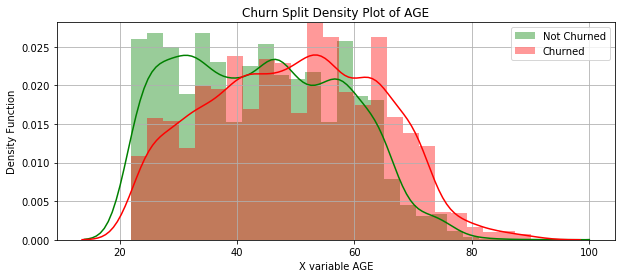

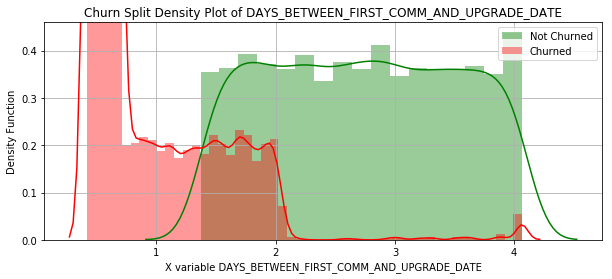

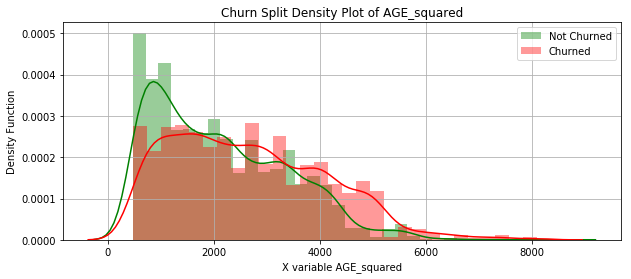

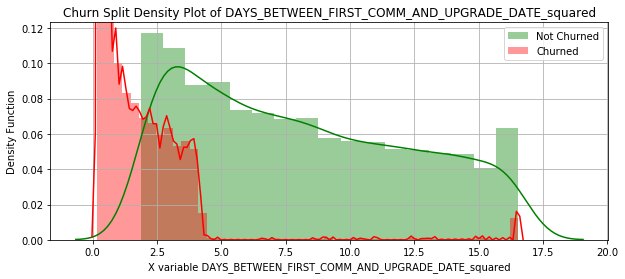

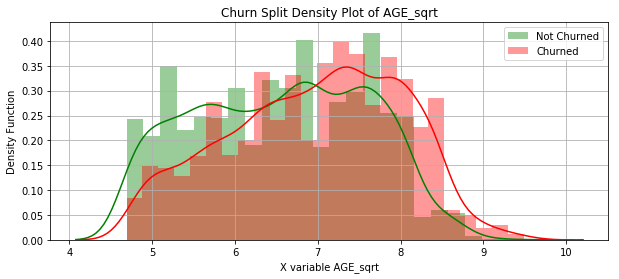

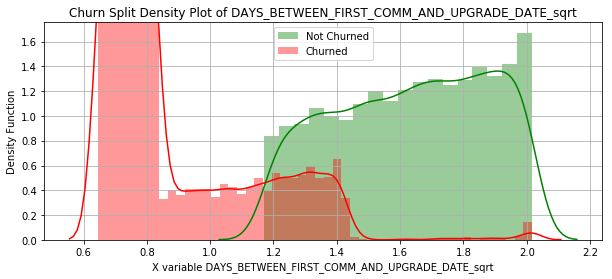

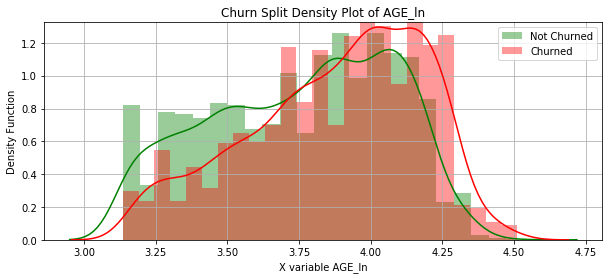

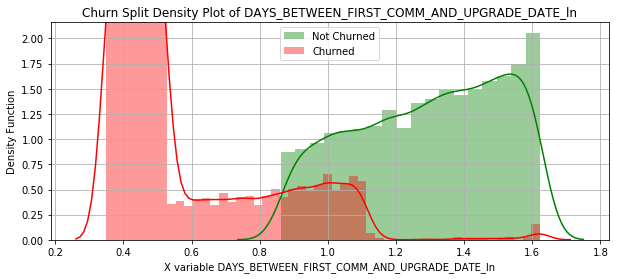

In [331]:
num_list = ['AGE', 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE', 'AGE_squared',
       'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE_squared', 'AGE_sqrt',
       'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE_sqrt', 'AGE_ln',
       'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE_ln']

#bp = PdfPages('Density Plots with Churn.pdf')
bp = PdfPages('Density Plots with Churn Split.pdf')

for num_variable in num_list:
    fig,axes = plt.subplots(figsize=(10,4))
    #sns.distplot(data_cust[num_variable], kde=False, color='g', hist=True)
    sns.distplot(data_cust_transform[data_cust_transform['CHURNED']==0][num_variable], label='Not Churned', color='g', hist=True, norm_hist=False)
    sns.distplot(data_cust_transform[data_cust_transform['CHURNED']==1][num_variable], label='Churned', color='r', hist=True, norm_hist=False)
    plt.xlabel(str("X variable ") + str(num_variable) )
    plt.ylabel('Density Function')
    #plt.title(str('Churn Density Plot of ')+str(num_variable))
    plt.title(str('Churn Split Density Plot of ')+str(num_variable))
    plt.legend()
    bp.savefig(fig)

bp.close()

In [332]:
llf_df = pd.DataFrame()
for num_variable in data_cust_transform.columns.difference(['CHURNED']):
    logreg = sm.logit(formula = str('CHURNED ~ ')+str(num_variable), data=data_cust_transform)
    logreg.fit?
    result = logreg.fit()
    summ = result.summary()
    temp = pd.DataFrame([num_variable, result.llf]).T
    temp.columns = ['Variable Name','Log-Likelihood Full']
    llf_df = pd.concat([llf_df, temp], axis=0)

print(llf_df)


Optimization terminated successfully.
         Current function value: 0.673823
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674480
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674097
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.673643
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.195700
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.183595
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.185400
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.231385
         Iterations 9
                                      Variable Name Log-Likelihood Full
0                                               AGE            -6385.15
0                                       

In [333]:
cat_list

['SERVICE_PLAN',
 'MODEL',
 'SALES_CHANNEL',
 'DIRECT_INDIRECT_CHANNEL',
 'SALES_SOURCE',
 'ZIPCODE',
 'FEEDBACK',
 'SATELLITE',
 'SITE_TYPE_DESC',
 'WARRANTY_NAME',
 'MOST_RECENT_SALES_CHANNEL',
 'GENDER',
 'MARITAL_STATUS',
 'COMPUTER_OWNER']

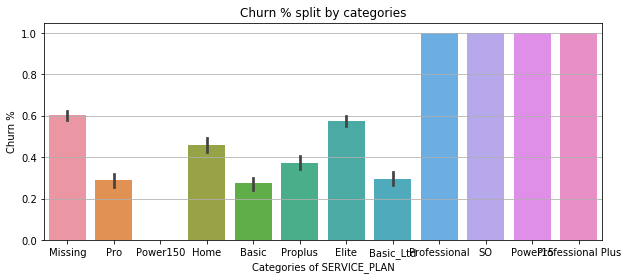

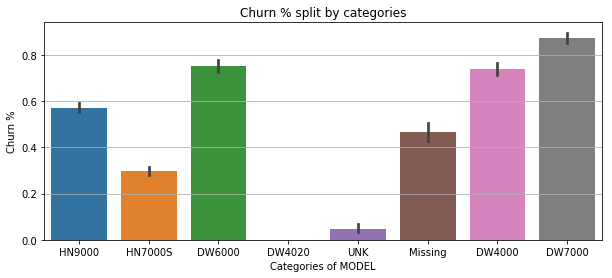

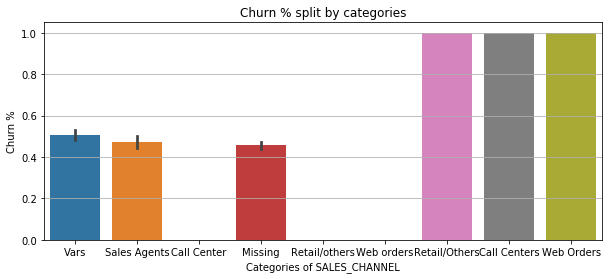

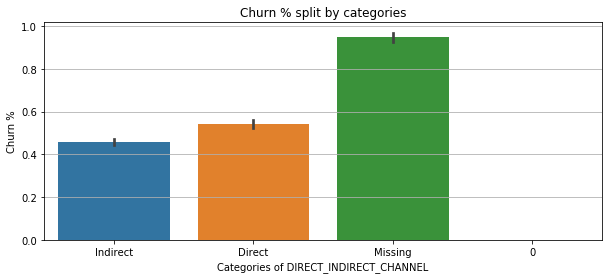

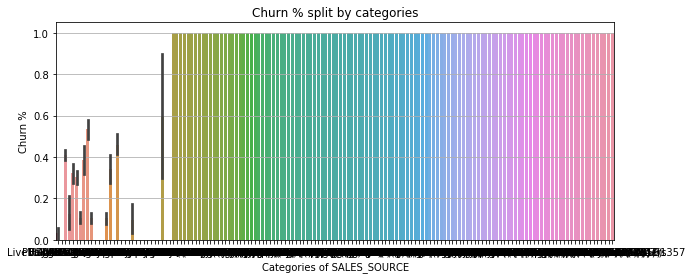

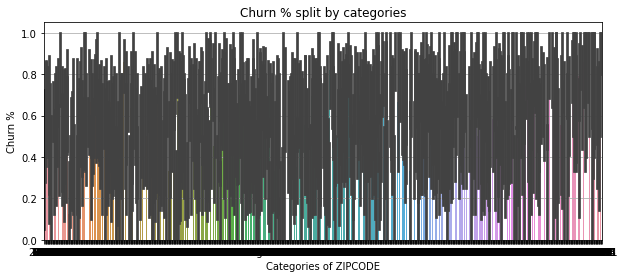

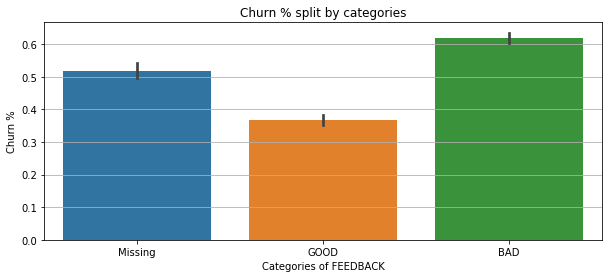

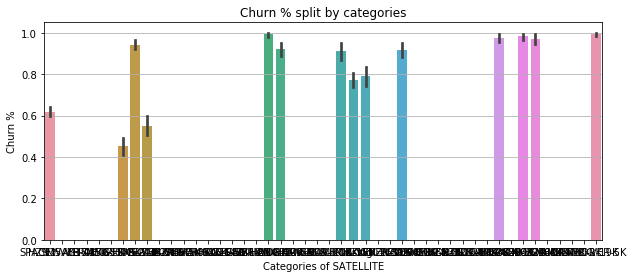

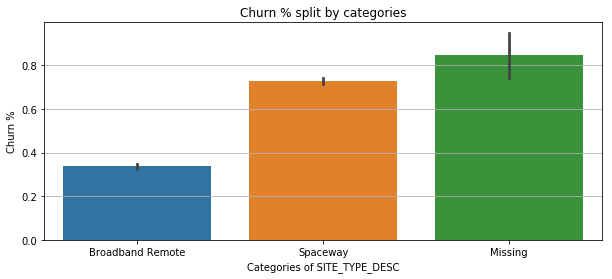

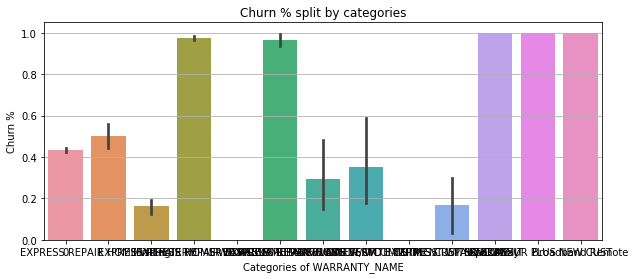

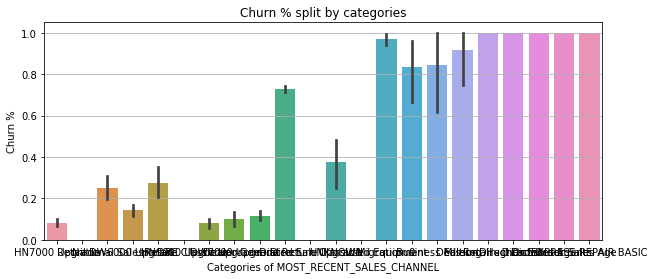

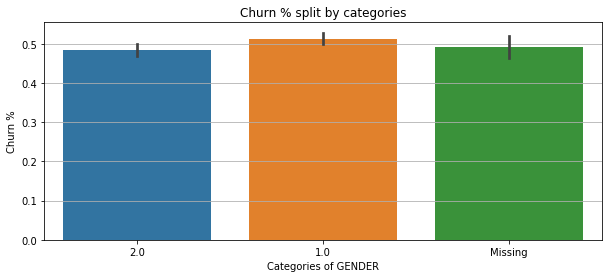

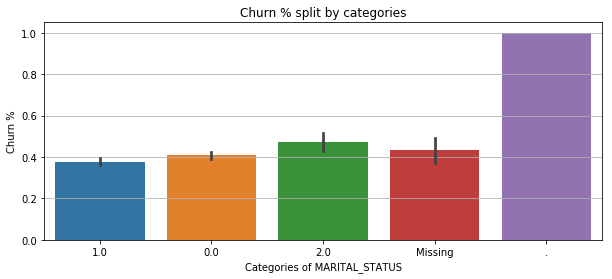

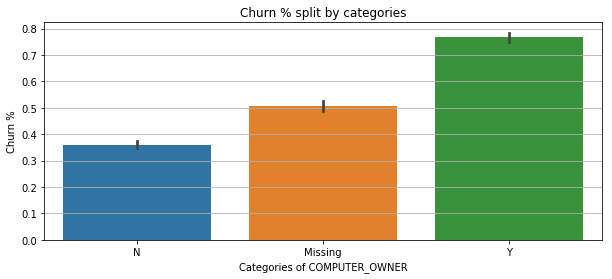

In [334]:
bp = PdfPages('Churn Plots by Categorical Variable.pdf')

for cat_variable in cat_list:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=cat_variable,y='CHURNED',data=data_cust) 
    plt.ylabel('Churn %')
    plt.xlabel(str('Categories of ') + str(cat_variable))
    plt.title('Churn % split by categories')
    bp.savefig(fig)

bp.close()

In [335]:
#Bucketing for numeric vars

In [336]:
#data_cust.info()
num_list = ['AGE', 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE']

AGE
(9476,)
AGE
1      0.525172
2      0.711929
3      1.035036
4      0.900901
5      1.260125
6      1.082822
7      2.528889
8      1.720930
9      7.571429
10    12.000000
Name: CHURNED, dtype: float64
AGE
1    -0.644030
2    -0.339777
3     0.034437
4    -0.104360
5     0.231211
6     0.079571
7     0.927780
8     0.542865
9     2.024382
10    2.484907
Name: CHURNED, dtype: float64
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE
(9476,)
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE
1          inf
2          inf
3     1.364754
4     0.529771
5     0.282430
6     0.001531
7     0.003040
8     0.011419
9     0.007924
10    0.034074
Name: CHURNED, dtype: float64
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE
1          inf
2          inf
3     0.310974
4    -0.635310
5    -1.264324
6    -6.481577
7    -5.796058
8    -4.472455
9    -4.837868
10   -3.379218
Name: CHURNED, dtype: float64


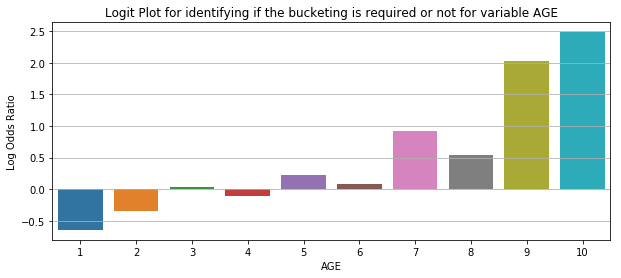

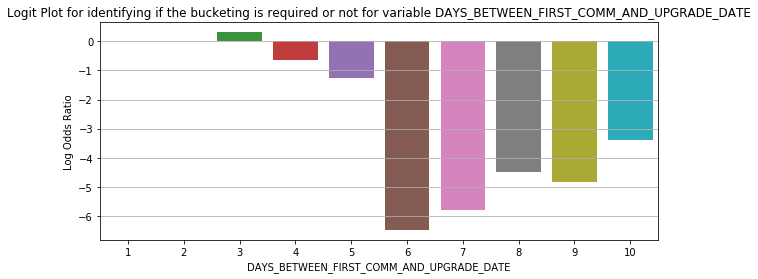

In [337]:
bp = PdfPages('Transformation Plots.pdf')

for num_variable in num_list:
    print(num_variable)
    binned = pd.cut(data_cust[num_variable], bins=10, labels=list(range(1,11)))
    #print(binned)
    binned = binned.dropna()
    print(binned.shape)
    ser = data_cust.groupby(binned)['CHURNED'].sum() / (data_cust.groupby(binned)['CHURNED'].count()-data_cust.groupby(binned)['CHURNED'].sum())
    print(ser)
    ser = np.log(ser)
    print(ser)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=ser.index,y=ser)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

In [338]:
data_cust[['AGE', 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE']].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
AGE,9476.0,46.752427,14.320438,22.000000,27.000000,32.000000,37.000000,42.000000,47.000000,51.000000,56.000000,61.000000,66.000000,92.000000
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,9476.0,1.763286,1.168654,0.418493,0.487671,0.561644,0.638356,1.093151,1.632877,1.975342,2.482192,3.005479,3.558904,4.065753


In [339]:
#Bucketing
#def age_buckt(x):
    #if x < 38:
        #return 'young'
    #if (38 < x < 46) or (x == 38): 
     #   return 'middle'
    #if (46 < x < 56) or (x == 46):
     #   return 'old'
    #if (x > 56) or (x == 56):
     #   return 'older'
    
#def duration_buckt(x):
 #   if 0.41 < x < 0.57:
  #      return 'less'
   # if (0.57 < x < 1.2) or (x == 0.57):
    #    return 'medium'
    #if (1.2 < x < 1.7) or (x == 1.2):
     #   return 'long'
    #if (x > 1.7) or (x == 1.7):
        #return 'longer'

In [340]:
#data_cust['AGE'] = data_cust['AGE'].apply(age_buckt)

In [341]:
data_cust['AGE'].unique()

array([ 69.,  43.,  58.,  36.,  56.,  57.,  42.,  54.,  30.,  50.,  28.,
        31.,  38.,  66.,  23.,  41.,  52.,  25.,  22.,  46.,  29.,  71.,
        35.,  26.,  48.,  40.,  44.,  62.,  49.,  74.,  34.,  32.,  27.,
        39.,  64.,  55.,  47.,  33.,  75.,  65.,  61.,  24.,  53.,  72.,
        51.,  45.,  59.,  63.,  37.,  70.,  76.,  73.,  68.,  60.,  67.,
        78.,  84.,  80.,  86.,  82.,  92.,  90.,  81.,  83.,  79.,  89.,
        77.])

In [342]:
#data_cust['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'] = data_cust['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'].apply(duration_buckt)


In [343]:
#Bucketing for categorical variables

In [344]:
data_cust[cat_list].apply(lambda x:x.nunique(), axis = 0)

SERVICE_PLAN                  12
MODEL                          8
SALES_CHANNEL                  9
DIRECT_INDIRECT_CHANNEL        4
SALES_SOURCE                 150
ZIPCODE                      894
FEEDBACK                       3
SATELLITE                     46
SITE_TYPE_DESC                 3
WARRANTY_NAME                 13
MOST_RECENT_SALES_CHANNEL     22
GENDER                         3
MARITAL_STATUS                 5
COMPUTER_OWNER                 3
dtype: int64

In [345]:
#Bucketing SERVICE_PLAN
service_grp = data_cust[['SERVICE_PLAN','CHURNED']].groupby('SERVICE_PLAN').sum() / data_cust[['SERVICE_PLAN','CHURNED']].groupby('SERVICE_PLAN').count()
print(service_grp.sort_values('CHURNED'))
print(data_cust['SERVICE_PLAN'].unique())

                    CHURNED
SERVICE_PLAN               
Power150           0.000000
Basic              0.272941
Pro                0.288030
Basic_Ltd          0.295858
Proplus            0.373333
Home               0.459486
Elite              0.573343
Missing            0.602101
Power15            1.000000
Professional       1.000000
Professional Plus  1.000000
SO                 1.000000
['Missing' 'Pro' 'Power150' 'Home' 'Basic' 'Proplus' 'Elite' 'Basic_Ltd'
 'Professional' 'SO' 'Power15' 'Professional Plus']


In [346]:
def churn_rate(x):
    if x in ('Professional' 'SO' 'Power15' 'Professional Plus'):
        return 'high';
    if x in ('Home','Elite','Missing'):
        return 'medium';
    if x in ('Pro','Basic', 'Basic_Ltd', 'Proplus'):
        return 'low';
    if x in ('Power150'):
        return 'zero';

In [347]:
data_cust['SERVICE_PLAN'] = data_cust['SERVICE_PLAN'].apply(churn_rate)
data_cust_2['SERVICE_PLAN'] = data_cust_2['SERVICE_PLAN'].apply(churn_rate)

In [348]:
data_cust.head(5)

,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,ZIPCODE,FEEDBACK,SATELLITE,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,CHURNED,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE
0,medium,HN9000,Vars,Indirect,UNKNOWN,20876,Missing,SPACEWAY3,Broadband Remote,0,HN7000 Upgrade,2,69.0,5.984522,1,Missing,N,0,2.046575
1,high,HN7000S,Sales Agents,Indirect,NCC,8091,GOOD,HZN2-VER-4K,Spaceway,0,Retail,2,43.0,4.000000,1,Missing,N,0,3.271233
2,zero,HN9000,Call Center,Indirect,NCC,70653,BAD,SM5-VER-15K,Broadband Remote,0,National Sales,2,58.0,4.000000,1,Missing,N,0,3.134247
3,medium,HN7000S,Call Center,Indirect,TAG,12723,GOOD,0,Broadband Remote,0,DW6000 Upgrade,1,36.0,7.000000,0,Missing,Missing,0,2.295890
4,zero,HN7000S,Missing,Indirect,ValueElectronics,64060,Missing,G17-HOR-2K,Broadband Remote,0,Retail,1,56.0,3.000000,1,Missing,Missing,0,1.536986


In [349]:
#Bucketing MODEL
service_grp = data_cust[['MODEL','CHURNED']].groupby('MODEL').sum() / data_cust[['MODEL','CHURNED']].groupby('MODEL').count()
print(service_grp.sort_values('CHURNED'))
print(data_cust['MODEL'].unique())

          CHURNED
MODEL            
DW4020   0.000000
UNK      0.048583
HN7000S  0.298684
Missing  0.465909
HN9000   0.571171
DW4000   0.738074
DW6000   0.752066
DW7000   0.873646
['HN9000' 'HN7000S' 'DW6000' 'DW4020' 'UNK' 'Missing' 'DW4000' 'DW7000']


In [350]:
def churn_rate_model(x):
    if x in ('DW6000','DW4000','DW7000'):
        return 'high';
    if x in ('HN9000','Missing','HN7000S' ):
        return 'medium';
    if x in ('DW4020','UNK'):
        return 'low';
    
data_cust['MODEL'] = data_cust['MODEL'].apply(churn_rate_model)
data_cust_2['MODEL'] = data_cust_2['MODEL'].apply(churn_rate_model)

In [351]:
data_cust['SALES_CHANNEL'].unique()

array(['Vars', 'Sales Agents', 'Call Center', 'Missing', 'Retail/others',
       'Web orders', 'Retail/Others', 'Call Centers', 'Web Orders'], dtype=object)

In [352]:
data_cust['SALES_CHANNEL'] = data_cust['SALES_CHANNEL'].replace('Call Centers', 'Call Center')
data_cust['SALES_CHANNEL'] = data_cust['SALES_CHANNEL'].replace('Web Orders', 'Web orders')
data_cust['SALES_CHANNEL'] = data_cust['SALES_CHANNEL'].replace('Retail/Others', 'Retail/others')

data_cust_2['SALES_CHANNEL'] = data_cust_2['SALES_CHANNEL'].replace('Call Centers', 'Call Center')
data_cust_2['SALES_CHANNEL'] = data_cust_2['SALES_CHANNEL'].replace('Web Orders', 'Web orders')
data_cust_2['SALES_CHANNEL'] = data_cust_2['SALES_CHANNEL'].replace('Retail/Others', 'Retail/others')

data_cust['SALES_CHANNEL'].unique()
data_cust_2['SALES_CHANNEL'].unique()

array(['Sales Agents', 'Call Center', 'Retail/others', 'Vars', 'Missing',
       'Web orders'], dtype=object)

In [353]:
#Bucketing SALES_CHANNEL
service_grp = data_cust[['SALES_CHANNEL','CHURNED']].groupby('SALES_CHANNEL').sum() / data_cust[['SALES_CHANNEL','CHURNED']].groupby('SALES_CHANNEL').count()
print(service_grp.sort_values('CHURNED'))
print(data_cust['SALES_CHANNEL'].unique())

                CHURNED
SALES_CHANNEL          
Missing        0.457076
Sales Agents   0.472593
Vars           0.506386
Web orders     0.516779
Call Center    0.537564
Retail/others  0.541775
['Vars' 'Sales Agents' 'Call Center' 'Missing' 'Retail/others' 'Web orders']


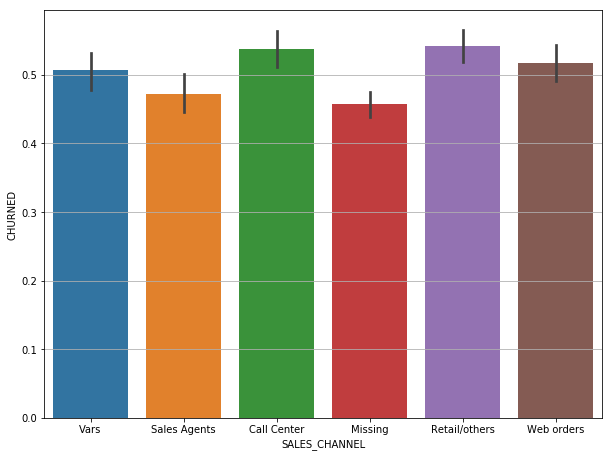

In [354]:
sns.barplot(x='SALES_CHANNEL', y='CHURNED', data = data_cust)

In [355]:
# For all the sales channel churn rate is almost equal. Hence, we remove this variable

In [356]:
print(cat_list)
cat_list.remove('SALES_CHANNEL')
print(cat_list)

['SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'ZIPCODE', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'MARITAL_STATUS', 'COMPUTER_OWNER']
['SERVICE_PLAN', 'MODEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'ZIPCODE', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'MARITAL_STATUS', 'COMPUTER_OWNER']


In [357]:
data_cust.drop(['SALES_CHANNEL'], inplace=True, axis = 1)
data_cust_2.drop(['SALES_CHANNEL'], inplace=True, axis = 1)

In [358]:
data_cust['DIRECT_INDIRECT_CHANNEL'].unique()

array(['Indirect', 'Direct', 'Missing', 0], dtype=object)

In [359]:
data_cust['DIRECT_INDIRECT_CHANNEL'].value_counts()

Indirect    6639
Direct      2418
Missing      416
0              3
Name: DIRECT_INDIRECT_CHANNEL, dtype: int64

In [360]:
print(data_cust[['DIRECT_INDIRECT_CHANNEL', 'CHURNED']].groupby('DIRECT_INDIRECT_CHANNEL'))

In [361]:
channel_grp = data_cust[['DIRECT_INDIRECT_CHANNEL', 'CHURNED']].groupby('DIRECT_INDIRECT_CHANNEL').sum()/data_cust[['DIRECT_INDIRECT_CHANNEL','CHURNED']].groupby('DIRECT_INDIRECT_CHANNEL').count()
print(channel_grp)

                          CHURNED
DIRECT_INDIRECT_CHANNEL          
0                        0.000000
Direct                   0.541356
Indirect                 0.457147
Missing                  0.947115


In [362]:
#Droppin rows with DIRECT_INDIRECT_CHANNEL as 0
index_list = list(data_cust[data_cust['DIRECT_INDIRECT_CHANNEL'] == 0].index)
print(index_list)
data_cust.drop(index_list, axis = 0, inplace=True)
data_cust.reset_index(drop = True, inplace = True)
data_cust['DIRECT_INDIRECT_CHANNEL'].value_counts()

[670, 1211, 2859]


Indirect    6639
Direct      2418
Missing      416
Name: DIRECT_INDIRECT_CHANNEL, dtype: int64

In [363]:
#Binning direct and indirect in a single category and missing in another
def churn_rate_channel(x):
    if x in ['Direct', 'Indirect']:
        return 'low_churn'
    if x in ['Missing']:
        return 'high_churn'
    
data_cust['DIRECT_INDIRECT_CHANNEL'] = data_cust['DIRECT_INDIRECT_CHANNEL'].apply(churn_rate_channel)
data_cust_2['DIRECT_INDIRECT_CHANNEL'] = data_cust_2['DIRECT_INDIRECT_CHANNEL'].apply(churn_rate_channel)

In [364]:
data_cust['SALES_SOURCE'].nunique()

150

In [365]:
data_cust['SALES_SOURCE'].value_counts().to_csv('sales_source_details.csv')
data_cust_2['SALES_SOURCE'].value_counts().to_csv('sales_source2_details.csv')

In [366]:
data_cust['SALES_SOURCE'] = data_cust['SALES_SOURCE'].replace(0, '0')
data_cust_2['SALES_SOURCE'] = data_cust_2['SALES_SOURCE'].replace(0, '0')
sales_source_grp = data_cust[['SALES_SOURCE', 'CHURNED']].groupby('SALES_SOURCE').sum()/data_cust[['SALES_SOURCE','CHURNED']].groupby('SALES_SOURCE').count()
#sales_source_grp.sort_values('CHURNED').to_csv('sales_source_churn_rate.csv')
churn_rate = pd.DataFrame(sales_source_grp.sort_values('CHURNED'))
#churn_rate.reset_index(drop=True, inplace=True)
#churn_rate.columns = ['Column_name', 'Churn_rate']
churn_rate.head(5)
print(list(churn_rate[churn_rate['CHURNED'] == 0.0].index))
print(list(churn_rate[(churn_rate['CHURNED'] > 0.5) & (churn_rate['CHURNED'] < 1)].index))

['0', 'InfoDish', 'Verisign Web Ordering', 'Hughes Internal Sales', 'NCC', 'NRTC', 'OROURKE BROTHERS', 'PEGASUS', 'PEGASUS BROADBAND COMMUNICATIO', 'Professional Satellites', 'Ridgeline USA LLC (RSI573306)', 'SKYWALKER COMMUNICATIONS', 'Skylink', 'D&H DISTRIBUTING', 'Alpha Satellite (RSI568059)', 'Todays TV', 'J & L AND SONS CUSTOM INSTALLATIONS INC']
['LiveBridge Communications LLC', 'Skylink (RSI572499)']


In [367]:
zero_churn = list(churn_rate[(churn_rate['CHURNED'] < 0.05) | (churn_rate['CHURNED'] == 0.05)].index)
print(zero_churn)
low_churn = list(churn_rate[(churn_rate['CHURNED'] > 0.05) & (churn_rate['CHURNED'] < 0.5) | (churn_rate['CHURNED'] == 0.5)].index)
print(low_churn)
medium_churn = list(churn_rate[(churn_rate['CHURNED'] > 0.5) & (churn_rate['CHURNED'] < 0.9) | (churn_rate['CHURNED'] == 0.9)].index)
print(medium_churn)
high_churn = list(churn_rate[churn_rate['CHURNED'] > 0.9].index)
print(high_churn)
                               
def churn_rate_sales_source(x):
    if x in zero_churn:
        return 'zero_churn'
    if x in low_churn:
        return 'low_churn'
    if x in medium_churn:
        return 'medium_churn'
    if x in high_churn:
        return 'high_churn'
                               
data_cust['SALES_SOURCE'] = data_cust['SALES_SOURCE'].apply(churn_rate_sales_source)
data_cust_2['SALES_SOURCE'] = data_cust_2['SALES_SOURCE'].apply(churn_rate_sales_source)

['0', 'InfoDish', 'Verisign Web Ordering', 'Hughes Internal Sales', 'NCC', 'NRTC', 'OROURKE BROTHERS', 'PEGASUS', 'PEGASUS BROADBAND COMMUNICATIO', 'Professional Satellites', 'Ridgeline USA LLC (RSI573306)', 'SKYWALKER COMMUNICATIONS', 'Skylink', 'D&H DISTRIBUTING', 'Alpha Satellite (RSI568059)', 'Todays TV', 'J & L AND SONS CUSTOM INSTALLATIONS INC', 'UNKNOWN']
['MiniDish', 'RS&I', 'Perfect 10', 'AmericanSat', 'ValueElectronics', 'Hughes Web Order', 'Missing', 'Best Buy', 'ACS Pre-Install', 'TAG', 'ACS']
['LiveBridge Communications LLC', 'Skylink (RSI572499)']
['Lonestar Communications (RSI570694)', 'Jon Comer dba Satellite Internet Americ', 'Tulsa Audio & Video (RSI578633)', 'Valley Satellite (RSI561377)', 'OKS Ameridial Inc (CC)', 'NationWide Satellite (SA)', 'USA 800 (CC)', 'Klein Enterprise', 'NAL Corp (P10)', 'Montana Satellite & Wireless (RSI561357', 'Lanco Satellite & Home Threatre (P10)', 'Millennium Satellite (RSI578535)', 'Syntelesys Inc dba Ytech (DSAR)', 'Metro 25 of Detro

In [368]:
data_cust['SALES_SOURCE'].unique()

array(['zero_churn', 'low_churn', 'medium_churn', 'high_churn'], dtype=object)

In [369]:
cat_list

['SERVICE_PLAN',
 'MODEL',
 'DIRECT_INDIRECT_CHANNEL',
 'SALES_SOURCE',
 'ZIPCODE',
 'FEEDBACK',
 'SATELLITE',
 'SITE_TYPE_DESC',
 'WARRANTY_NAME',
 'MOST_RECENT_SALES_CHANNEL',
 'GENDER',
 'MARITAL_STATUS',
 'COMPUTER_OWNER']

In [370]:
data_cust['ZIPCODE'].value_counts().to_csv('zipcodeDetails.csv')

In [371]:
data_cust['ZIPCODE'].head(5)

0    20876
1     8091
2    70653
3    12723
4    64060
Name: ZIPCODE, dtype: object

In [372]:
zipcode_churn = data_cust[['ZIPCODE','CHURNED']].groupby('ZIPCODE').sum()/data_cust[['ZIPCODE','CHURNED']].groupby('ZIPCODE').count()
zipcode_churn.sort_values(by='CHURNED').to_csv('zipcode_churn1.csv')

In [373]:
zipcode_churn = zipcode_churn.sort_values(by='CHURNED')

In [374]:
zipcode_churn['CHURNED'].unique()

array([ 0.        ,  0.06666667,  0.125     ,  0.14285714,  0.16666667,
        0.1875    ,  0.2       ,  0.20833333,  0.21052632,  0.21428571,
        0.22222222,  0.23076923,  0.25      ,  0.26666667,  0.27272727,
        0.28571429,  0.3       ,  0.30769231,  0.3125    ,  0.33333333,
        0.35294118,  0.35714286,  0.36363636,  0.375     ,  0.37931034,
        0.38461538,  0.4       ,  0.41666667,  0.42857143,  0.43478261,
        0.4375    ,  0.44444444,  0.45      ,  0.45454545,  0.46153846,
        0.46666667,  0.47058824,  0.47368421,  0.48      ,  0.5       ,
        0.51428571,  0.51724138,  0.52173913,  0.52380952,  0.52941176,
        0.53333333,  0.53571429,  0.53846154,  0.54545455,  0.55      ,
        0.55555556,  0.56      ,  0.5625    ,  0.56666667,  0.57142857,
        0.57534247,  0.57575758,  0.57894737,  0.58333333,  0.59090909,
        0.6       ,  0.60714286,  0.60869565,  0.61111111,  0.61538462,
        0.61764706,  0.61904762,  0.625     ,  0.63157895,  0.63

In [375]:
data_cust['ZIPCODE'].head(5)

0    20876
1     8091
2    70653
3    12723
4    64060
Name: ZIPCODE, dtype: object

In [376]:
low_churn_zip = list(zipcode_churn[(zipcode_churn['CHURNED'] < 0.3) | (zipcode_churn['CHURNED'] == 0.3)].index)
print(low_churn_zip)
medium_churn_zip = list(zipcode_churn[(zipcode_churn['CHURNED'] > 0.3) & (zipcode_churn['CHURNED'] < 0.7) | (zipcode_churn['CHURNED'] == 0.7)].index)
print(medium_churn_zip)
high_churn_zip = list(zipcode_churn[zipcode_churn['CHURNED'] > 0.7].index)
print(high_churn_zip)
                               
def churn_rate_zip(x):
    if x in low_churn_zip:
        return 'low_churn_zip'
    if x in medium_churn_zip:
        return 'medium_churn_zip'
    if x in high_churn_zip:
        return 'high_churn_zip'
                               
data_cust['ZIPCODE'] = data_cust['ZIPCODE'].apply(churn_rate_zip)
data_cust_2['ZIPCODE'] = data_cust_2['ZIPCODE'].apply(churn_rate_zip)

[37865, 77414, 46140, 45810, 45769, 45645, 45338, 77450, 44851, 44620, 44287, 44201, 77521, 43920, 43701, 77532, 43522, 43337, 43112, 43076, 43066, 77546, 46391, 94952, 47024, 47108, 76058, 48877, 76233, 48850, 76250, 76462, 48625, 48619, 76522, 76834, 42103, 97037, 94954, 48072, 48032, 48002, 47918, 47720, 47631, 47460, 47358, 47112, 76859, 49120, 94589, 94566, 78253, 35630, 35446, 35133, 35127, 35057, 35044, 78616, 34736, 34230, 97601, 33355, 78620, 33316, 97622, 79830, 32428, 32327, 79938, 31733, 31046, 36093, 36803, 37064, 97486, 39478, 94552, 39336, 39175, 39095, 39094, 77659, 38944, 97402, 97462, 77614, 38632, 97470, 38382, 38240, 72046, 37857, 37744, 78112, 78124, 78152, 37325, 78104, 80102, 49269, 49343, 95456, 65560, 95476, 65286, 65285, 65020, 73071, 64850, 64804, 64060, 73075, 63780, 63368, 73089, 73165, 73446, 73650, 63012, 74023, 74039, 95542, 65714, 72948, 65746, 66094, 72023, 72016, 95338, 72007, 71953, 72076, 72110, 71720, 72114, 95335, 62849, 95410, 71031, 95236, 68832

In [377]:
print(data_cust['ZIPCODE'].unique())

['low_churn_zip' 'medium_churn_zip' 'high_churn_zip']


'FEEDBACK',
 'SATELLITE',
 'SITE_TYPE_DESC',
 'WARRANTY_NAME',
 'MOST_RECENT_SALES_CHANNEL',
 'GENDER',
 'MARITAL_STATUS',
 'COMPUTER_OWNER' are left for categorization

In [378]:
feedback_churn = data_cust[['FEEDBACK','CHURNED']].groupby('FEEDBACK').sum()/data_cust[['FEEDBACK','CHURNED']].groupby('FEEDBACK').count()
print(feedback_churn)

           CHURNED
FEEDBACK          
BAD       0.619841
GOOD      0.365971
Missing   0.519084


In [379]:
satellite_churn = data_cust[['SATELLITE','CHURNED']].groupby('SATELLITE').sum()/data_cust[['SATELLITE','CHURNED']].groupby('SATELLITE').count()
print(satellite_churn.sort_values(by='CHURNED'))

               CHURNED
SATELLITE             
0             0.000000
HZN2-VER-4K   0.000000
HZN-VER-6K    0.000000
SM5-HOR-14K   0.000000
HZN-VER-11K   0.000000
SM5-HOR-6K    0.000000
HZN-HOR-19K   0.000000
G3C-VER-9K    0.000000
SM5-VER-15K   0.000000
G3C-VER-21K   0.000000
SM6-VER-2K    0.000000
SM5-VER-1K    0.000000
SM5-VER-5K    0.000000
G17-HOR-6K    0.000000
G17-HOR-2K    0.000000
G16-VER-2K    0.000000
G16-VER-21K   0.000000
G16-VER-1K    0.000000
AM32-HOR-19K  0.000000
AM32-HOR-7K   0.000000
SM6-HOR-13K   0.000000
AM9-HOR-19K   0.000000
AM9-HOR-21K   0.000000
HZN2-VER-5K   0.000000
AM9-VER-22K   0.000000
AM9-VER-2K    0.000000
AMC-HOR-10K   0.000000
SM6-HOR-12K   0.000000
G16-HOR-2K    0.000000
G16-HOR-8K    0.000000
AM9-VER-2K    0.000000
HZN2-VER-8K   0.000000
AM6-HOR-21K   0.451724
SM5-VER-7K    0.550691
SPACEWAY3     0.618286
Missing       0.771261
G16-VER-15K   0.790210
AM9-HOR-17K   0.911602
HZN-VER-23K   0.918367
HZN-HOR-8K    0.922559
G3C-VER-24K   0.940816
G26-HOR-14K

In [380]:
low_churn_satellite = list(satellite_churn[(satellite_churn['CHURNED'] < 0.4) | (satellite_churn['CHURNED'] == 0.4)].index)
print(low_churn_zip)
medium_churn_satellite = list(satellite_churn[(satellite_churn['CHURNED'] > 0.4) & (satellite_churn['CHURNED'] < 0.75) | (satellite_churn['CHURNED'] == 0.75)].index)
print(medium_churn_zip)
high_churn_satellite = list(satellite_churn[satellite_churn['CHURNED'] > 0.75].index)
print(high_churn_zip)
                               
def churn_rate_satellite(x):
    if x in low_churn_satellite:
        return 'low_churn_satellite'
    if x in medium_churn_satellite:
        return 'medium_churn_satellite'
    if x in high_churn_satellite:
        return 'high_churn_satellite'
                               
data_cust['SATELLITE'] = data_cust['SATELLITE'].apply(churn_rate_satellite)
data_cust_2['SATELLITE'] = data_cust_2['SATELLITE'].apply(churn_rate_satellite)

[37865, 77414, 46140, 45810, 45769, 45645, 45338, 77450, 44851, 44620, 44287, 44201, 77521, 43920, 43701, 77532, 43522, 43337, 43112, 43076, 43066, 77546, 46391, 94952, 47024, 47108, 76058, 48877, 76233, 48850, 76250, 76462, 48625, 48619, 76522, 76834, 42103, 97037, 94954, 48072, 48032, 48002, 47918, 47720, 47631, 47460, 47358, 47112, 76859, 49120, 94589, 94566, 78253, 35630, 35446, 35133, 35127, 35057, 35044, 78616, 34736, 34230, 97601, 33355, 78620, 33316, 97622, 79830, 32428, 32327, 79938, 31733, 31046, 36093, 36803, 37064, 97486, 39478, 94552, 39336, 39175, 39095, 39094, 77659, 38944, 97402, 97462, 77614, 38632, 97470, 38382, 38240, 72046, 37857, 37744, 78112, 78124, 78152, 37325, 78104, 80102, 49269, 49343, 95456, 65560, 95476, 65286, 65285, 65020, 73071, 64850, 64804, 64060, 73075, 63780, 63368, 73089, 73165, 73446, 73650, 63012, 74023, 74039, 95542, 65714, 72948, 65746, 66094, 72023, 72016, 95338, 72007, 71953, 72076, 72110, 71720, 72114, 95335, 62849, 95410, 71031, 95236, 68832

In [381]:
data_cust['SATELLITE'].unique()

array(['medium_churn_satellite', 'low_churn_satellite',
       'high_churn_satellite'], dtype=object)

In [382]:
#'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'MARITAL_STATUS', 'COMPUTER_OWNER' are left for categorization

In [383]:
data_cust['SITE_TYPE_DESC'].value_counts()

Broadband Remote    5546
Spaceway            3888
Missing               39
Name: SITE_TYPE_DESC, dtype: int64

In [384]:
churn_rate_site = data_cust[['SITE_TYPE_DESC', 'CHURNED']].groupby('SITE_TYPE_DESC').sum()/data_cust[['SITE_TYPE_DESC', 'CHURNED']].groupby('SITE_TYPE_DESC').count()
print(churn_rate_site.sort_values(by = 'CHURNED'))

                   CHURNED
SITE_TYPE_DESC            
Broadband Remote  0.337901
Spaceway          0.728138
Missing           0.846154


In [385]:
data_cust['WARRANTY_NAME'].value_counts()

0                                                7368
EXPRESS REPAIR BASIC                             1161
Missing                                           395
EXPRESS REPAIR HOME WITH TERM                     262
SRVC ASSUR STD NEW CUST                           153
EXPRESS REPAIR HOME                                30
EXPRESS REPAIR BUSINESS WITH TERM                  27
EXPRESS REPAIR HOME WITH COMMITMENT WITH TERM      18
EXPRESS REPAIR HOME W/O COMMITMENT WITH TERM       17
Broadband Remote                                   15
SRVC ASSUR STD EXISTING CUST NO COMMIT              9
Spaceway                                            9
SRVC ASSUR PLUS NEW CUST                            9
Name: WARRANTY_NAME, dtype: int64

In [386]:
churn_rate_warranty = data_cust[['WARRANTY_NAME', 'CHURNED']].groupby('WARRANTY_NAME').sum()/data_cust[['WARRANTY_NAME', 'CHURNED']].groupby('WARRANTY_NAME').count()
print(churn_rate_warranty.sort_values(by = 'CHURNED'))

                                                CHURNED
WARRANTY_NAME                                          
EXPRESS REPAIR HOME WITH COMMITMENT WITH TERM  0.000000
SRVC ASSUR STD EXISTING CUST NO COMMIT         0.000000
Missing                                        0.162025
EXPRESS REPAIR HOME                            0.166667
EXPRESS REPAIR BUSINESS WITH TERM              0.296296
EXPRESS REPAIR HOME W/O COMMITMENT WITH TERM   0.352941
0                                              0.435532
EXPRESS REPAIR HOME WITH TERM                  0.503817
SRVC ASSUR STD NEW CUST                        0.967320
EXPRESS REPAIR BASIC                           0.975883
Broadband Remote                               1.000000
SRVC ASSUR PLUS NEW CUST                       1.000000
Spaceway                                       1.000000


In [387]:
low_churn_warranty = list(churn_rate_warranty[(churn_rate_warranty['CHURNED'] < 0.45) | (churn_rate_warranty['CHURNED'] == 0.45)].index)
print(low_churn_warranty)
medium_churn_warranty = list(churn_rate_warranty[(churn_rate_warranty['CHURNED'] > 0.45) & (churn_rate_warranty['CHURNED'] < 0.79) | (churn_rate_warranty['CHURNED'] == 0.79)].index)
print(medium_churn_warranty)
high_churn_warranty = list(churn_rate_warranty[churn_rate_warranty['CHURNED'] > 0.79].index)
print(high_churn_warranty)
                               
def churn_rate_for_warranty(x):
    if x in low_churn_warranty:
        return 'low_churn_warranty'
    if x in medium_churn_warranty:
        return 'medium_churn_warranty'
    if x in high_churn_warranty:
        return 'high_churn_warranty'
                               
data_cust['WARRANTY_NAME'] = data_cust['WARRANTY_NAME'].apply(churn_rate_for_warranty)
data_cust_2['WARRANTY_NAME'] = data_cust_2['WARRANTY_NAME'].apply(churn_rate_for_warranty)

['0', 'EXPRESS REPAIR BUSINESS WITH TERM', 'EXPRESS REPAIR HOME', 'EXPRESS REPAIR HOME W/O COMMITMENT WITH TERM', 'EXPRESS REPAIR HOME WITH COMMITMENT WITH TERM', 'Missing', 'SRVC ASSUR STD EXISTING CUST NO COMMIT']
['EXPRESS REPAIR HOME WITH TERM']
['Broadband Remote', 'EXPRESS REPAIR BASIC', 'SRVC ASSUR PLUS NEW CUST', 'SRVC ASSUR STD NEW CUST', 'Spaceway']


In [388]:
data_cust['WARRANTY_NAME'].unique()

array(['low_churn_warranty', 'medium_churn_warranty', 'high_churn_warranty'], dtype=object)

In [389]:
#'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'MARITAL_STATUS', 'COMPUTER_OWNER' are left for categorization

In [390]:
#data_cust['MOST_RECENT_SALES_CHANNEL'].value_counts()
recent_channel_churn_rate = data_cust[['MOST_RECENT_SALES_CHANNEL', 'CHURNED']].groupby('MOST_RECENT_SALES_CHANNEL').sum()/data_cust[['MOST_RECENT_SALES_CHANNEL', 'CHURNED']].groupby('MOST_RECENT_SALES_CHANNEL').count()
print(recent_channel_churn_rate.sort_values(by = 'CHURNED'))

                            CHURNED
MOST_RECENT_SALES_CHANNEL          
Classic Migration          0.000000
Retail                     0.000000
Dial Return Upgrade        0.000000
HN9000 Upgrade             0.000000
DPC Classic upgrade        0.079922
HN7000 Upgrade             0.082960
DW7000 Upgrade             0.099265
Dealer-Generated Sale      0.116343
DW6000 Upgrade             0.142132
National Sales             0.250996
Retail                     0.275000
UNKNOWN                    0.375000
Direct                     0.729730
0                          0.833333
Business Edition           0.846154
Missing                    0.916667
Used Equipment             0.969925
EXPRESS REPAIR BASIC       1.000000
Dealer - Direct Order      1.000000
Retail - Direct Order      1.000000
Hughes Sales Agents        1.000000
Distributor Sales Age      1.000000


In [391]:
low_churn_channel = list(recent_channel_churn_rate[(recent_channel_churn_rate['CHURNED'] < 0.45) | (recent_channel_churn_rate['CHURNED'] == 0.45)].index)
print(low_churn_channel)
medium_churn_channel = list(recent_channel_churn_rate[(recent_channel_churn_rate['CHURNED'] > 0.45) & (recent_channel_churn_rate['CHURNED'] < 0.79) | (recent_channel_churn_rate['CHURNED'] == 0.79)].index)
print(medium_churn_channel)
high_churn_channel = list(recent_channel_churn_rate[recent_channel_churn_rate['CHURNED'] > 0.79].index)
print(high_churn_warranty)
                               
def churn_rate_recent_channel(x):
    if x in low_churn_channel:
        return 'low_churn_channel'
    if x in medium_churn_channel:
        return 'medium_churn_channel'
    if x in high_churn_channel:
        return 'high_churn_channel'
                               
data_cust['MOST_RECENT_SALES_CHANNEL'] = data_cust['MOST_RECENT_SALES_CHANNEL'].apply(churn_rate_recent_channel)
data_cust_2['MOST_RECENT_SALES_CHANNEL'] = data_cust_2['MOST_RECENT_SALES_CHANNEL'].apply(churn_rate_recent_channel)

['Classic Migration', 'DPC Classic upgrade', 'DW6000 Upgrade', 'DW7000 Upgrade', 'Dealer-Generated Sale', 'Dial Return Upgrade', 'HN7000 Upgrade', 'HN9000 Upgrade', 'National Sales', 'Retail', 'Retail       ', 'UNKNOWN']
['Direct']
['Broadband Remote', 'EXPRESS REPAIR BASIC', 'SRVC ASSUR PLUS NEW CUST', 'SRVC ASSUR STD NEW CUST', 'Spaceway']


In [392]:
data_cust['MOST_RECENT_SALES_CHANNEL'].unique()

array(['low_churn_channel', 'medium_churn_channel', 'high_churn_channel'], dtype=object)

In [393]:
churn_rate = data_cust[['GENDER', 'CHURNED']].groupby('GENDER').sum()/data_cust[['GENDER', 'CHURNED']].groupby('GENDER').count()
print(churn_rate.sort_values(by = 'CHURNED'))

          CHURNED
GENDER           
2.0      0.485079
Missing  0.493255
1.0      0.514019


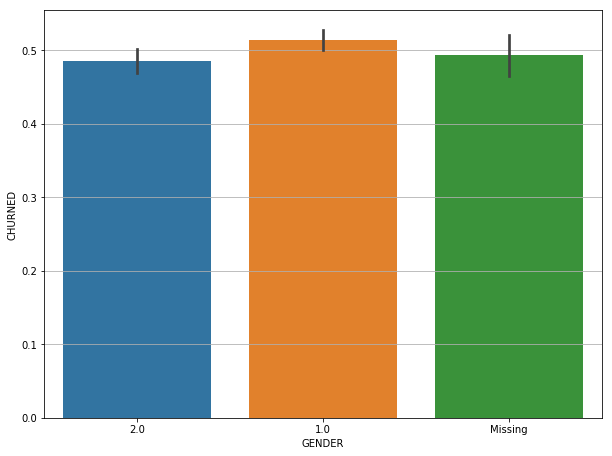

In [394]:
sns.barplot(x = 'GENDER', y = 'CHURNED', data = data_cust)

In [395]:
#Dropping gender variable as churn rate is almost same for all categories of gender
data_cust.drop(['GENDER'], axis = 1, inplace=True)
data_cust_2.drop(['GENDER'], axis = 1, inplace=True)
#cat_list = cat_list.remove('GENDER')

In [396]:
data_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9473 entries, 0 to 9472
Data columns (total 17 columns):
SERVICE_PLAN                                9473 non-null object
MODEL                                       9473 non-null object
DIRECT_INDIRECT_CHANNEL                     9473 non-null object
SALES_SOURCE                                9473 non-null object
ZIPCODE                                     9473 non-null object
FEEDBACK                                    9473 non-null object
SATELLITE                                   9473 non-null object
SITE_TYPE_DESC                              9473 non-null object
WARRANTY_NAME                               9473 non-null object
MOST_RECENT_SALES_CHANNEL                   9473 non-null object
AGE                                         9473 non-null float64
INCOME                                      9473 non-null float64
MARITAL_STATUS                              9473 non-null object
PRESENCE_OF_CHILDREN                        94

In [397]:
data_cust['MARITAL_STATUS'] = data_cust['MARITAL_STATUS'].replace('.','Unknown')
data_cust_2['MARITAL_STATUS'] = data_cust_2['MARITAL_STATUS'].replace('.','Unknown')
churn_rate_maital_status = data_cust[['MARITAL_STATUS', 'CHURNED']].groupby('MARITAL_STATUS').sum()/data_cust[['MARITAL_STATUS', 'CHURNED']].groupby('MARITAL_STATUS').count()
print(churn_rate_maital_status.sort_values(by = 'CHURNED'))

                 CHURNED
MARITAL_STATUS          
1.0             0.377772
0.0             0.408277
Missing         0.434783
2.0             0.473233
Unknown         1.000000


In [398]:
data_cust['MARITAL_STATUS'].value_counts()

0.0        3576
1.0        3563
Unknown    1591
2.0         467
Missing     276
Name: MARITAL_STATUS, dtype: int64

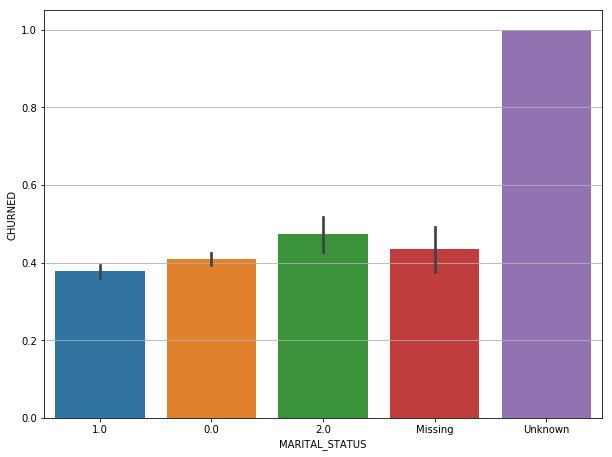

In [399]:
sns.barplot(x='MARITAL_STATUS', y = 'CHURNED', data= data_cust)

In [400]:
def marital_status_category(x):
    if x in ['Unknown']:
        return 'Unknown'
    else:
        return 'Other'
    
data_cust['MARITAL_STATUS'] = data_cust['MARITAL_STATUS'].apply(marital_status_category)
data_cust_2['MARITAL_STATUS'] = data_cust_2['MARITAL_STATUS'].apply(marital_status_category)

print(data_cust['MARITAL_STATUS'])

0         Other
1         Other
2         Other
3         Other
4         Other
5         Other
6         Other
7         Other
8         Other
9         Other
10        Other
11        Other
12        Other
13        Other
14        Other
15        Other
16        Other
17        Other
18        Other
19        Other
20        Other
21        Other
22        Other
23        Other
24        Other
25        Other
26        Other
27        Other
28        Other
29        Other
         ...   
9443      Other
9444      Other
9445    Unknown
9446    Unknown
9447      Other
9448    Unknown
9449      Other
9450      Other
9451    Unknown
9452      Other
9453      Other
9454    Unknown
9455      Other
9456    Unknown
9457    Unknown
9458    Unknown
9459      Other
9460      Other
9461      Other
9462      Other
9463    Unknown
9464      Other
9465      Other
9466      Other
9467      Other
9468      Other
9469      Other
9470      Other
9471      Other
9472      Other
Name: MARITAL_STATUS, Le

In [401]:
data_cust['COMPUTER_OWNER'].value_counts()

N          4455
Missing    2753
Y          2265
Name: COMPUTER_OWNER, dtype: int64

In [402]:
churn_rate= data_cust[['COMPUTER_OWNER', 'CHURNED']].groupby('COMPUTER_OWNER').sum()/data_cust[['COMPUTER_OWNER', 'CHURNED']].groupby('COMPUTER_OWNER').count()
print(churn_rate.sort_values(by = 'CHURNED'))

                 CHURNED
COMPUTER_OWNER          
N               0.360943
Missing         0.506357
Y               0.766446


In [403]:
data_cust.head(5)

,SERVICE_PLAN,MODEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,ZIPCODE,FEEDBACK,SATELLITE,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,CHURNED,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE
0,medium,medium,low_churn,zero_churn,low_churn_zip,Missing,medium_churn_satellite,Broadband Remote,low_churn_warranty,low_churn_channel,69.0,5.984522,Other,Missing,N,0,2.046575
1,high,medium,low_churn,zero_churn,medium_churn_zip,GOOD,low_churn_satellite,Spaceway,low_churn_warranty,low_churn_channel,43.0,4.000000,Other,Missing,N,0,3.271233
2,zero,medium,low_churn,zero_churn,medium_churn_zip,BAD,low_churn_satellite,Broadband Remote,low_churn_warranty,low_churn_channel,58.0,4.000000,Other,Missing,N,0,3.134247
3,medium,medium,low_churn,low_churn,medium_churn_zip,GOOD,low_churn_satellite,Broadband Remote,low_churn_warranty,low_churn_channel,36.0,7.000000,Other,Missing,Missing,0,2.295890
4,zero,medium,low_churn,low_churn,low_churn_zip,Missing,low_churn_satellite,Broadband Remote,low_churn_warranty,low_churn_channel,56.0,3.000000,Other,Missing,Missing,0,1.536986


In [404]:
#Using Somer's D values to chek for numerical vars
data_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9473 entries, 0 to 9472
Data columns (total 17 columns):
SERVICE_PLAN                                9473 non-null object
MODEL                                       9473 non-null object
DIRECT_INDIRECT_CHANNEL                     9473 non-null object
SALES_SOURCE                                9473 non-null object
ZIPCODE                                     9473 non-null object
FEEDBACK                                    9473 non-null object
SATELLITE                                   9473 non-null object
SITE_TYPE_DESC                              9473 non-null object
WARRANTY_NAME                               9473 non-null object
MOST_RECENT_SALES_CHANNEL                   9473 non-null object
AGE                                         9473 non-null float64
INCOME                                      9473 non-null float64
MARITAL_STATUS                              9473 non-null object
PRESENCE_OF_CHILDREN                        94

In [405]:
data_cust['AGE'].unique()

array([ 69.,  43.,  58.,  36.,  56.,  57.,  42.,  54.,  30.,  50.,  28.,
        31.,  38.,  66.,  23.,  41.,  52.,  25.,  22.,  46.,  29.,  71.,
        35.,  26.,  48.,  40.,  44.,  62.,  49.,  74.,  34.,  32.,  27.,
        39.,  64.,  55.,  47.,  33.,  75.,  65.,  61.,  24.,  53.,  72.,
        51.,  45.,  59.,  63.,  37.,  70.,  76.,  73.,  68.,  60.,  67.,
        78.,  84.,  80.,  86.,  82.,  92.,  90.,  81.,  83.,  79.,  89.,
        77.])

In [406]:
#num_list
data_cust['DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE'].unique()

array([ 2.04657534,  3.27123288,  3.13424658, ...,  1.18630137,
        1.31506849,  1.3260274 ])

In [407]:
somersd_df = pd.DataFrame()
for num_variable in num_list:
    logreg = sm.logit(formula = str('CHURNED ~ ')+str(num_variable), data=data_cust)
    result = logreg.fit()
    summ = result.summary()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(data_cust['CHURNED'],y_score) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

somersd_df

Optimization terminated successfully.
         Current function value: 0.673787
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.195760
         Iterations 9


,Variable Name,SomersD
0,AGE,0.218582
0,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,0.951373


In [408]:
#Somer's D is >0.05 for both of above vars. Hence, not dropping any var

In [409]:
data_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9473 entries, 0 to 9472
Data columns (total 17 columns):
SERVICE_PLAN                                9473 non-null object
MODEL                                       9473 non-null object
DIRECT_INDIRECT_CHANNEL                     9473 non-null object
SALES_SOURCE                                9473 non-null object
ZIPCODE                                     9473 non-null object
FEEDBACK                                    9473 non-null object
SATELLITE                                   9473 non-null object
SITE_TYPE_DESC                              9473 non-null object
WARRANTY_NAME                               9473 non-null object
MOST_RECENT_SALES_CHANNEL                   9473 non-null object
AGE                                         9473 non-null float64
INCOME                                      9473 non-null float64
MARITAL_STATUS                              9473 non-null object
PRESENCE_OF_CHILDREN                        94

In [410]:
#Creating dummy variables
list(data_cust.columns)

['SERVICE_PLAN',
 'MODEL',
 'DIRECT_INDIRECT_CHANNEL',
 'SALES_SOURCE',
 'ZIPCODE',
 'FEEDBACK',
 'SATELLITE',
 'SITE_TYPE_DESC',
 'WARRANTY_NAME',
 'MOST_RECENT_SALES_CHANNEL',
 'AGE',
 'INCOME',
 'MARITAL_STATUS',
 'PRESENCE_OF_CHILDREN',
 'COMPUTER_OWNER',
 'CHURNED',
 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE']

In [411]:
def create_dummy(cat_var, prefix_var, data_df):
    get_dummies = pd.get_dummies(data=data_df[cat_var], prefix=prefix_var, drop_first=True)
    #data_df = pd.concat([data_df, get_dummies], axis=1)
    return get_dummies

data_cust = pd.concat([data_cust, create_dummy('SERVICE_PLAN', 'plan', data_cust)], axis =1)
data_cust_2 = pd.concat([data_cust_2, create_dummy('SERVICE_PLAN', 'plan', data_cust_2)], axis =1)

In [412]:
#data_cust.head(5)


In [413]:
data_cust = pd.concat([data_cust, create_dummy('MODEL', 'model', data_cust)], axis =1)
data_cust = pd.concat([data_cust, create_dummy('DIRECT_INDIRECT_CHANNEL', 'channel', data_cust)], axis =1)
data_cust = pd.concat([data_cust, create_dummy('SALES_SOURCE', 'source', data_cust)], axis =1)
data_cust = pd.concat([data_cust, create_dummy('ZIPCODE', 'zip', data_cust)], axis =1)
data_cust = pd.concat([data_cust, create_dummy('FEEDBACK', 'feedback', data_cust)], axis =1)
data_cust = pd.concat([data_cust, create_dummy('SATELLITE', 'satellite', data_cust)], axis =1)
data_cust = pd.concat([data_cust, create_dummy('SITE_TYPE_DESC', 'site', data_cust)], axis =1)
data_cust = pd.concat([data_cust, create_dummy('WARRANTY_NAME', 'warranty', data_cust)], axis =1)
data_cust = pd.concat([data_cust, create_dummy('MOST_RECENT_SALES_CHANNEL', 'recent_channel', data_cust)], axis =1)
data_cust = pd.concat([data_cust, create_dummy('MARITAL_STATUS', 'status', data_cust)], axis =1)
data_cust = pd.concat([data_cust, create_dummy('COMPUTER_OWNER', 'comp_owner', data_cust)], axis =1)

data_cust_2 = pd.concat([data_cust_2, create_dummy('MODEL', 'model', data_cust_2)], axis =1)
data_cust_2 = pd.concat([data_cust_2, create_dummy('DIRECT_INDIRECT_CHANNEL', 'channel', data_cust_2)], axis =1)
data_cust_2 = pd.concat([data_cust_2, create_dummy('SALES_SOURCE', 'source', data_cust_2)], axis =1)
data_cust_2 = pd.concat([data_cust_2, create_dummy('ZIPCODE', 'zip', data_cust_2)], axis =1)
data_cust_2 = pd.concat([data_cust_2, create_dummy('FEEDBACK', 'feedback', data_cust_2)], axis =1)
data_cust_2 = pd.concat([data_cust_2, create_dummy('SATELLITE', 'satellite', data_cust_2)], axis =1)
data_cust_2 = pd.concat([data_cust_2, create_dummy('SITE_TYPE_DESC', 'site', data_cust_2)], axis =1)
data_cust_2 = pd.concat([data_cust_2, create_dummy('WARRANTY_NAME', 'warranty', data_cust_2)], axis =1)
data_cust_2 = pd.concat([data_cust_2, create_dummy('MOST_RECENT_SALES_CHANNEL', 'recent_channel', data_cust_2)], axis =1)
data_cust_2 = pd.concat([data_cust_2, create_dummy('MARITAL_STATUS', 'status', data_cust_2)], axis =1)
data_cust_2 = pd.concat([data_cust_2, create_dummy('COMPUTER_OWNER', 'comp_owner', data_cust_2)], axis =1)

In [414]:
data_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9473 entries, 0 to 9472
Data columns (total 41 columns):
SERVICE_PLAN                                9473 non-null object
MODEL                                       9473 non-null object
DIRECT_INDIRECT_CHANNEL                     9473 non-null object
SALES_SOURCE                                9473 non-null object
ZIPCODE                                     9473 non-null object
FEEDBACK                                    9473 non-null object
SATELLITE                                   9473 non-null object
SITE_TYPE_DESC                              9473 non-null object
WARRANTY_NAME                               9473 non-null object
MOST_RECENT_SALES_CHANNEL                   9473 non-null object
AGE                                         9473 non-null float64
INCOME                                      9473 non-null float64
MARITAL_STATUS                              9473 non-null object
PRESENCE_OF_CHILDREN                        94

In [415]:
data_cust.drop(['SERVICE_PLAN',
 'MODEL',
 'DIRECT_INDIRECT_CHANNEL',
 'SALES_SOURCE',
 'ZIPCODE',
 'FEEDBACK',
 'SATELLITE',
 'SITE_TYPE_DESC',
 'WARRANTY_NAME',
 'MOST_RECENT_SALES_CHANNEL',
 'MARITAL_STATUS',
 'COMPUTER_OWNER'], axis = 1, inplace=True)

data_cust_2.drop(['SERVICE_PLAN',
 'MODEL',
 'DIRECT_INDIRECT_CHANNEL',
 'SALES_SOURCE',
 'ZIPCODE',
 'FEEDBACK',
 'SATELLITE',
 'SITE_TYPE_DESC',
 'WARRANTY_NAME',
 'MOST_RECENT_SALES_CHANNEL',
 'MARITAL_STATUS',
 'COMPUTER_OWNER'], axis = 1, inplace=True)

data_cust.head(5)

,AGE,INCOME,PRESENCE_OF_CHILDREN,CHURNED,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,plan_low,plan_medium,plan_zero,model_low,model_medium,...,satellite_medium_churn_satellite,site_Missing,site_Spaceway,warranty_low_churn_warranty,warranty_medium_churn_warranty,recent_channel_low_churn_channel,recent_channel_medium_churn_channel,status_Unknown,comp_owner_N,comp_owner_Y
0,69.0,5.984522,Missing,0,2.046575,0,1,0,0,1,...,1,0,0,1,0,1,0,0,1,0
1,43.0,4.000000,Missing,0,3.271233,0,0,0,0,1,...,0,0,1,1,0,1,0,0,1,0
2,58.0,4.000000,Missing,0,3.134247,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
3,36.0,7.000000,Missing,0,2.295890,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
4,56.0,3.000000,Missing,0,1.536986,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0


In [416]:
data_cust.to_csv('Telecom_Churn_Data.csv')

In [417]:
data_cust_2.to_csv('Telecom_Churn_Data_2.csv')

In [418]:
corr_var = list(data_cust.columns)
print(corr_var)

['AGE', 'INCOME', 'PRESENCE_OF_CHILDREN', 'CHURNED', 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE', 'plan_low', 'plan_medium', 'plan_zero', 'model_low', 'model_medium', 'channel_low_churn', 'source_low_churn', 'source_medium_churn', 'source_zero_churn', 'zip_low_churn_zip', 'zip_medium_churn_zip', 'feedback_GOOD', 'feedback_Missing', 'satellite_low_churn_satellite', 'satellite_medium_churn_satellite', 'site_Missing', 'site_Spaceway', 'warranty_low_churn_warranty', 'warranty_medium_churn_warranty', 'recent_channel_low_churn_channel', 'recent_channel_medium_churn_channel', 'status_Unknown', 'comp_owner_N', 'comp_owner_Y']


In [419]:
corr_var = ['AGE', 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE', 'plan_low', 'plan_medium', 'plan_zero', 'model_low', 'model_medium', 'channel_low_churn', 'source_low_churn', 'source_medium_churn', 'source_zero_churn', 'zip_low_churn_zip', 'zip_medium_churn_zip', 'feedback_GOOD', 'feedback_Missing', 'satellite_low_churn_satellite', 'satellite_medium_churn_satellite', 'site_Missing', 'site_Spaceway', 'warranty_low_churn_warranty', 'warranty_medium_churn_warranty', 'recent_channel_low_churn_channel', 'recent_channel_medium_churn_channel', 'status_Unknown', 'comp_owner_N', 'comp_owner_Y']

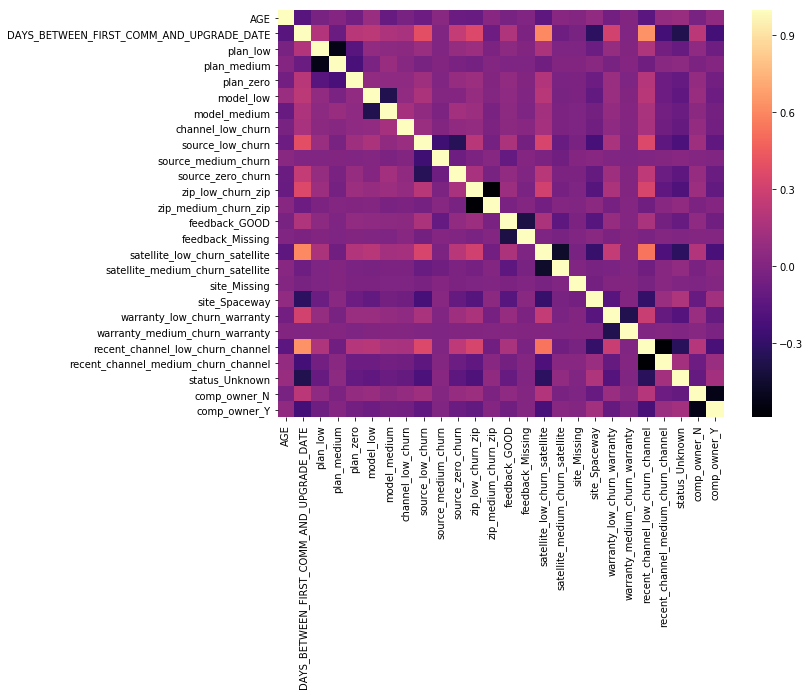

In [420]:

sns.heatmap(data_cust[corr_var].corr(), cmap='magma')

In [421]:
#Conclusion
#AGE and DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE  are mildly correlated
#plan_low and plan_medium are highly correlated
#model_low and model_medium are correlated
#source_low churn is correlated to source_medim_churn and source_zer_churn
#zip_low_churn_zip and zip_medium_churn_zip are correlated
#feedback binary indicators
#satellite binary indicators
#warranty binary indcators
#recent_channel and computer_owner binary indicators

In [422]:
## Variance Inflation Factor assessment

X = pd.concat([data_cust[corr_var],data_cust['CHURNED']], axis=1)
features = "+".join(corr_var)
print(features)
X.head()

AGE+DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE+plan_low+plan_medium+plan_zero+model_low+model_medium+channel_low_churn+source_low_churn+source_medium_churn+source_zero_churn+zip_low_churn_zip+zip_medium_churn_zip+feedback_GOOD+feedback_Missing+satellite_low_churn_satellite+satellite_medium_churn_satellite+site_Missing+site_Spaceway+warranty_low_churn_warranty+warranty_medium_churn_warranty+recent_channel_low_churn_channel+recent_channel_medium_churn_channel+status_Unknown+comp_owner_N+comp_owner_Y


,AGE,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,plan_low,plan_medium,plan_zero,model_low,model_medium,channel_low_churn,source_low_churn,source_medium_churn,...,site_Missing,site_Spaceway,warranty_low_churn_warranty,warranty_medium_churn_warranty,recent_channel_low_churn_channel,recent_channel_medium_churn_channel,status_Unknown,comp_owner_N,comp_owner_Y,CHURNED
0,69.0,2.046575,0,1,0,0,1,1,0,0,...,0,0,1,0,1,0,0,1,0,0
1,43.0,3.271233,0,0,0,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,0
2,58.0,3.134247,0,0,1,0,1,1,0,0,...,0,0,1,0,1,0,0,1,0,0
3,36.0,2.295890,0,1,0,0,1,1,1,0,...,0,0,1,0,1,0,0,0,0,0
4,56.0,1.536986,0,0,1,0,1,1,1,0,...,0,0,1,0,1,0,0,0,0,0


In [423]:
a,b = dmatrices(formula_like='CHURNED ~ '+ features, data = X, return_type='dataframe')
a.head(5)

,CHURNED
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [424]:
b.head(5)

,Intercept,AGE,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,plan_low,plan_medium,plan_zero,model_low,model_medium,channel_low_churn,source_low_churn,...,satellite_medium_churn_satellite,site_Missing,site_Spaceway,warranty_low_churn_warranty,warranty_medium_churn_warranty,recent_channel_low_churn_channel,recent_channel_medium_churn_channel,status_Unknown,comp_owner_N,comp_owner_Y
0,1.0,69.0,2.046575,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,43.0,3.271233,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,58.0,3.134247,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,36.0,2.295890,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,56.0,1.536986,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [425]:
b.columns

Index(['Intercept', 'AGE', 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE',
       'plan_low', 'plan_medium', 'plan_zero', 'model_low', 'model_medium',
       'channel_low_churn', 'source_low_churn', 'source_medium_churn',
       'source_zero_churn', 'zip_low_churn_zip', 'zip_medium_churn_zip',
       'feedback_GOOD', 'feedback_Missing', 'satellite_low_churn_satellite',
       'satellite_medium_churn_satellite', 'site_Missing', 'site_Spaceway',
       'warranty_low_churn_warranty', 'warranty_medium_churn_warranty',
       'recent_channel_low_churn_channel',
       'recent_channel_medium_churn_channel', 'status_Unknown', 'comp_owner_N',
       'comp_owner_Y'],
      dtype='object')

In [426]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns
print(vif)

    VIF Factor                                  features
0    56.039672                                 Intercept
1     1.060498                                       AGE
2     2.483285  DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE
3     1.740432                                  plan_low
4     1.688078                               plan_medium
5     1.324200                                 plan_zero
6     1.378669                                 model_low
7     1.356343                              model_medium
8     1.057208                         channel_low_churn
9     2.074038                          source_low_churn
10    1.201033                       source_medium_churn
11    1.697844                         source_zero_churn
12    1.882568                         zip_low_churn_zip
13    1.578054                      zip_medium_churn_zip
14    1.317440                             feedback_GOOD
15    1.212625                          feedback_Missing
16    2.598721             sate

In [427]:
#VIF > 3 for satellite_low_churn_satellite and recent_channel_low_churn_channel

In [210]:
b.drop(['satellite_low_churn_satellite', 'recent_channel_low_churn_channel'], axis=1, inplace=True)

In [428]:
data_cust_2_new = data_cust_2.drop(['satellite_low_churn_satellite', 'recent_channel_low_churn_channel'], axis=1, inplace=True)

In [429]:
b.columns

Index(['Intercept', 'AGE', 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE',
       'plan_low', 'plan_medium', 'plan_zero', 'model_low', 'model_medium',
       'channel_low_churn', 'source_low_churn', 'source_medium_churn',
       'source_zero_churn', 'zip_low_churn_zip', 'zip_medium_churn_zip',
       'feedback_GOOD', 'feedback_Missing', 'satellite_low_churn_satellite',
       'satellite_medium_churn_satellite', 'site_Missing', 'site_Spaceway',
       'warranty_low_churn_warranty', 'warranty_medium_churn_warranty',
       'recent_channel_low_churn_channel',
       'recent_channel_medium_churn_channel', 'status_Unknown', 'comp_owner_N',
       'comp_owner_Y'],
      dtype='object')

In [430]:
#b.drop(['Intercept'], inplace=True, axis =1 )

In [431]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns
print(vif)

    VIF Factor                                  features
0    56.039672                                 Intercept
1     1.060498                                       AGE
2     2.483285  DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE
3     1.740432                                  plan_low
4     1.688078                               plan_medium
5     1.324200                                 plan_zero
6     1.378669                                 model_low
7     1.356343                              model_medium
8     1.057208                         channel_low_churn
9     2.074038                          source_low_churn
10    1.201033                       source_medium_churn
11    1.697844                         source_zero_churn
12    1.882568                         zip_low_churn_zip
13    1.578054                      zip_medium_churn_zip
14    1.317440                             feedback_GOOD
15    1.212625                          feedback_Missing
16    2.598721             sate

# Model Build and Diagnostics

Train and test split

In [432]:
#X.columns
X.drop(['satellite_low_churn_satellite', 'recent_channel_low_churn_channel'], axis=1, inplace=True)

In [433]:
col_names = list(X.columns.difference(['CHURNED']))
col_names

['AGE',
 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE',
 'channel_low_churn',
 'comp_owner_N',
 'comp_owner_Y',
 'feedback_GOOD',
 'feedback_Missing',
 'model_low',
 'model_medium',
 'plan_low',
 'plan_medium',
 'plan_zero',
 'recent_channel_medium_churn_channel',
 'satellite_medium_churn_satellite',
 'site_Missing',
 'site_Spaceway',
 'source_low_churn',
 'source_medium_churn',
 'source_zero_churn',
 'status_Unknown',
 'warranty_low_churn_warranty',
 'warranty_medium_churn_warranty',
 'zip_low_churn_zip',
 'zip_medium_churn_zip']

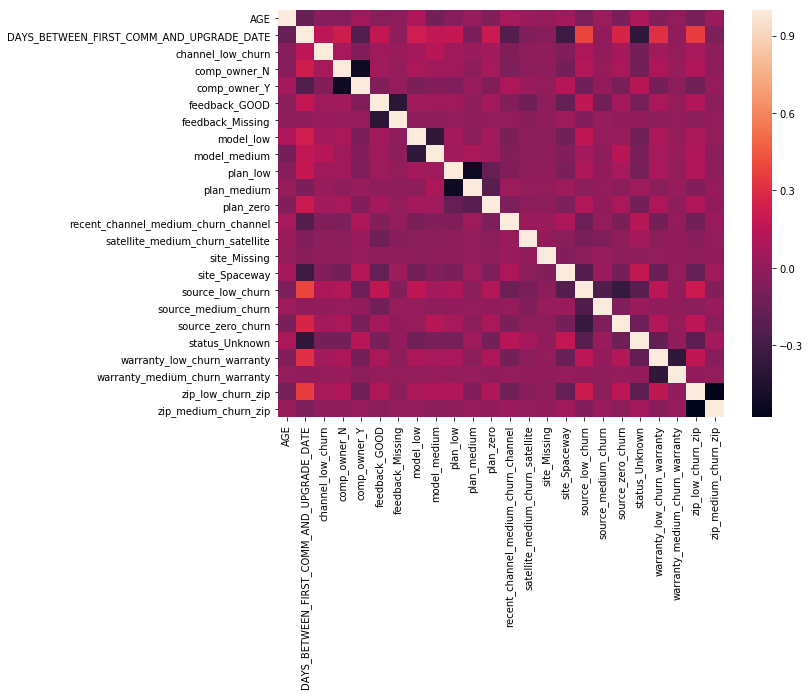

In [434]:
sns.heatmap(data_cust[col_names].corr())

In [459]:
X.head(5)

,AGE,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,plan_low,plan_medium,plan_zero,model_low,model_medium,channel_low_churn,source_low_churn,source_medium_churn,...,satellite_medium_churn_satellite,site_Missing,site_Spaceway,warranty_low_churn_warranty,warranty_medium_churn_warranty,recent_channel_medium_churn_channel,status_Unknown,comp_owner_N,comp_owner_Y,CHURNED
0,69.0,2.046575,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1,43.0,3.271233,0,0,0,0,1,1,0,0,...,0,0,1,1,0,0,0,1,0,0
2,58.0,3.134247,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,36.0,2.295890,0,1,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,56.0,1.536986,0,0,1,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [435]:
train_features = X.columns.difference(['CHURNED'])
train_X, test_X = train_test_split(X, test_size=0.5, random_state=42)
train_X.columns

Index(['AGE', 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE', 'plan_low',
       'plan_medium', 'plan_zero', 'model_low', 'model_medium',
       'channel_low_churn', 'source_low_churn', 'source_medium_churn',
       'source_zero_churn', 'zip_low_churn_zip', 'zip_medium_churn_zip',
       'feedback_GOOD', 'feedback_Missing', 'satellite_medium_churn_satellite',
       'site_Missing', 'site_Spaceway', 'warranty_low_churn_warranty',
       'warranty_medium_churn_warranty', 'recent_channel_medium_churn_channel',
       'status_Unknown', 'comp_owner_N', 'comp_owner_Y', 'CHURNED'],
      dtype='object')

Model build on the train_X sample

In [436]:
train_X.head(5)

,AGE,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,plan_low,plan_medium,plan_zero,model_low,model_medium,channel_low_churn,source_low_churn,source_medium_churn,...,satellite_medium_churn_satellite,site_Missing,site_Spaceway,warranty_low_churn_warranty,warranty_medium_churn_warranty,recent_channel_medium_churn_channel,status_Unknown,comp_owner_N,comp_owner_Y,CHURNED
6595,46.0,0.704110,0,1,0,0,1,1,0,0,...,0,0,1,1,0,0,0,0,0,1
9376,70.0,0.561644,0,1,0,0,1,1,0,0,...,0,0,1,1,0,0,0,0,1,1
2561,44.0,2.353425,0,0,1,0,1,1,1,0,...,1,0,0,1,0,1,0,0,1,0
3801,57.0,3.021918,0,1,0,0,1,1,1,0,...,1,0,1,1,0,0,0,0,1,0
2640,26.0,2.969863,1,0,0,0,1,1,1,0,...,0,0,0,1,0,0,0,1,0,0


In [437]:
train_features

Index(['AGE', 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE', 'channel_low_churn',
       'comp_owner_N', 'comp_owner_Y', 'feedback_GOOD', 'feedback_Missing',
       'model_low', 'model_medium', 'plan_low', 'plan_medium', 'plan_zero',
       'recent_channel_medium_churn_channel',
       'satellite_medium_churn_satellite', 'site_Missing', 'site_Spaceway',
       'source_low_churn', 'source_medium_churn', 'source_zero_churn',
       'status_Unknown', 'warranty_low_churn_warranty',
       'warranty_medium_churn_warranty', 'zip_low_churn_zip',
       'zip_medium_churn_zip'],
      dtype='object')

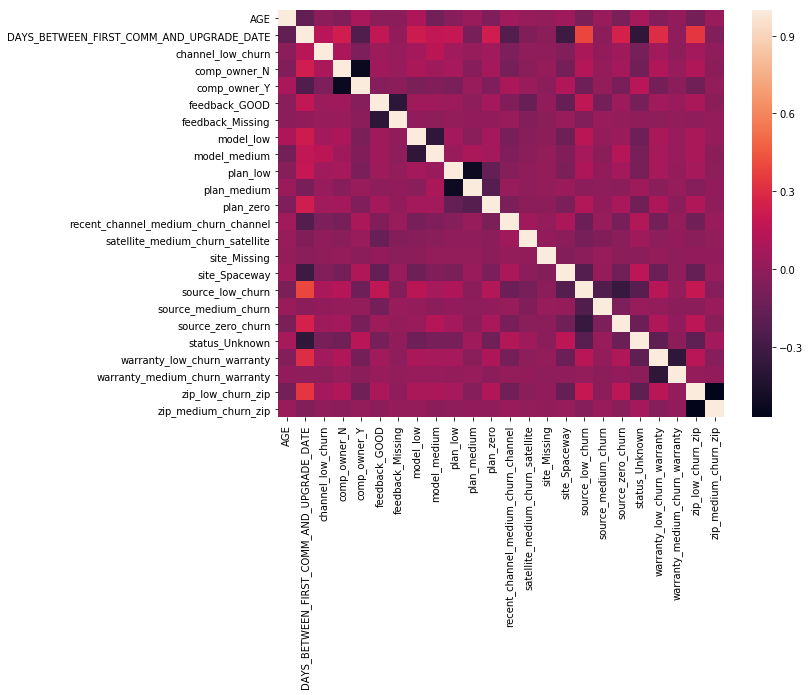

In [438]:
sns.heatmap(train_X[train_features].corr())

In [439]:
print(np.linalg.matrix_rank(train_X.values))

25


In [440]:
logreg = sm.logit(formula='CHURNED ~ ' + "+".join(train_features), data=train_X)

In [441]:
result = logreg.fit()
summ = result.summary()
summ

         Current function value: 0.047451
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                CHURNED   No. Observations:                 4736
Model:                          Logit   Df Residuals:                     4711
Method:                           MLE   Df Model:                           24
Date:                Sun, 09 Sep 2018   Pseudo R-squ.:                  0.9315
Time:                        22:23:46   Log-Likelihood:                -224.73
converged:                      False   LL-Null:                       -3282.0
                                        LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   35.0203   4787.655      0.007      0.994   -9348.611    9418.651
AGE                                          0.0263      0.009      2.852      0.004       0.008       0.044
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE    -3.3389      0.233    -14.349      0.000      -3.795      -2.883
channel_low_churn                           -3.1743      0.946     -3.357      0.001      -5.028      -1.321
comp_owner_N                                 0.0933      0.299      0.312      0.755      -0.494       0.680
comp_owner_Y                                 1.4707      0.366      4.016      0.000       0.753       2.189
feedback_GOOD                               -1.2760      0.289     -4.416      0.000      -1.842      -0.710
feedback_Missing                            -1.6435      0.401     -4.095      0.000      -2.430      -0.857
model_low                                   -4.4149      1.009     -4.376      0.000      -6.392      -2.437
model_medium                                -1.4705      0.282     -5.206      0.000      -2.024      -0.917
plan_low                                    -1.8406      0.381     -4.826      0.000      -2.588      -1.093
plan_medium                                 -0.7884      0.344     -2.293      0.022      -1.462      -0.114
plan_zero                                  -24.7032   3.38e+04     -0.001      0.999   -6.62e+04    6.61e+04
recent_channel_medium_churn_channel          1.6569      0.295      5.626      0.000       1.080       2.234
satellite_medium_churn_satellite             0.4851      0.303      1.599      0.110      -0.110       1.080
site_Missing                                 0.6112      2.399      0.255      0.799      -4.092       5.314
site_Spaceway                                0.9504      0.270      3.514      0.000       0.420       1.480
source_low_churn                           -22.8621   4787.654     -0.005      0.996   -9406.493    9360.768
source_medium_churn                        -22.2860   4787.655     -0.005      0.996   -9405.916    9361.344
source_zero_churn                          -27.8109   4787.655     -0.006      0.995   -9411.442    9355.820
status_Unknown                              23.4168   5321.201      0.004      0.996   -1.04e+04    1.05e+04
warranty_low_churn_warranty                 -3.0901      0.527     -5.868      0.000      -4.122      -2.058
warranty_medium_churn_warranty              -2.7519      0.800     -3.442      0.001      -4.319      -1.185
zip_low_churn_zip                           -3.2628      0.474     -6.880      0.000      -4.192      -2.333
zip_medium_churn_zip                        -1.2032      0.306     -3.927      0.000      -1.804      -0.603
============================================================================================================

Possibly complete quasi-separation: A fraction 0.61 of observations can be
perf

In [442]:
#comp_owner_N, plan_zero, site_Missing,source_low_churn,source_medium_churn, source_zero_churn, status_Unknown, are non significan vars as per the p_values

In [443]:
train_features_new = ['AGE', 'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE', 'channel_low_churn',
        'comp_owner_Y', 'feedback_GOOD', 'feedback_Missing',
       'model_low', 'model_medium', 'plan_low', 'plan_medium',
       'recent_channel_medium_churn_channel',
       'satellite_medium_churn_satellite', 'site_Spaceway',
       'warranty_low_churn_warranty',
       'warranty_medium_churn_warranty', 'zip_low_churn_zip',
       'zip_medium_churn_zip']

In [444]:
train_gini = 2*metrics.roc_auc_score(train_X['CHURNED'], result.predict()) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

The Gini Index for the model built on the Train Data is :  0.99582743156


In [445]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train_X))
train_predicted_prob.columns = ['prob']
train_actual = train_X['CHURNED']
# making a DataFrame with actual and prob columns
telecom_train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
telecom_train_predict.columns = ['actual','prob']
telecom_train_predict.head(15)

,actual,prob
6595,1,1.000000e+00
9376,1,1.000000e+00
2561,0,7.587550e-13
3801,0,1.373479e-03
2640,0,1.518070e-05
5865,1,4.487510e-01
4490,0,5.225884e-04
2347,0,2.988325e-06
7367,1,1.000000e+00
2781,0,6.153163e-05


In [446]:
telecom_train_predict[(telecom_train_predict['actual'] == 1) & (telecom_train_predict['prob'] < 1)].head(10)

,actual,prob
6595,1,1.000000
9376,1,1.000000
5865,1,0.448751
7367,1,1.000000
7976,1,0.962327
8216,1,1.000000
6260,1,0.580670
7716,1,0.748799
4861,1,1.000000
9436,1,0.958127


There is quite a clear seperation between 1s and 0s as seen above. For all 1s probability is greater than 0.9

In [447]:
#Checking the model for anothere dataset data_cust_2

In [449]:
feature_list = list(data_cust_2.columns.difference(['CHURNED']))
test2_X = data_cust_2[feature_list]
test2_Y = data_cust_2['CHURNED']

In [454]:
train_X.head(5)

,AGE,DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE,plan_low,plan_medium,plan_zero,model_low,model_medium,channel_low_churn,source_low_churn,source_medium_churn,...,satellite_medium_churn_satellite,site_Missing,site_Spaceway,warranty_low_churn_warranty,warranty_medium_churn_warranty,recent_channel_medium_churn_channel,status_Unknown,comp_owner_N,comp_owner_Y,CHURNED
6595,46.0,0.704110,0,1,0,0,1,1,0,0,...,0,0,1,1,0,0,0,0,0,1
9376,70.0,0.561644,0,1,0,0,1,1,0,0,...,0,0,1,1,0,0,0,0,1,1
2561,44.0,2.353425,0,0,1,0,1,1,1,0,...,1,0,0,1,0,1,0,0,1,0
3801,57.0,3.021918,0,1,0,0,1,1,1,0,...,1,0,1,1,0,0,0,0,1,0
2640,26.0,2.969863,1,0,0,0,1,1,1,0,...,0,0,0,1,0,0,0,1,0,0


In [457]:
test2_Y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: CHURNED, dtype: object

In [463]:
data_cust_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8135 entries, 0 to 8134
Data columns (total 29 columns):
FIRST_COMMUNICATION_DATE                    8135 non-null datetime64[ns]
UPGRADE_DATE                                8135 non-null datetime64[ns]
AGE                                         8135 non-null float64
INCOME                                      8135 non-null float64
PRESENCE_OF_CHILDREN                        8135 non-null object
CHURNED                                     8135 non-null object
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE    8135 non-null float64
plan_low                                    8135 non-null uint8
plan_medium                                 8135 non-null uint8
plan_zero                                   8135 non-null uint8
model_low                                   8135 non-null uint8
model_medium                                8135 non-null uint8
channel_low_churn                           8135 non-null uint8
source_low_churn                   

In [467]:
data_cust['CHURNED'].dtype

dtype('int64')

In [470]:
data_cust_2['CHURNED'] = data_cust_2['CHURNED'].astype('str').astype('int64')

In [471]:
data_cust_2['CHURNED'].dtype

dtype('int64')

In [472]:
test2_features = data_cust_2.columns.difference(['CHURNED'])
train2_X, test2_X = train_test_split(data_cust_2, test_size=0.5, random_state=42)
train2_X.columns

Index(['FIRST_COMMUNICATION_DATE', 'UPGRADE_DATE', 'AGE', 'INCOME',
       'PRESENCE_OF_CHILDREN', 'CHURNED',
       'DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE', 'plan_low', 'plan_medium',
       'plan_zero', 'model_low', 'model_medium', 'channel_low_churn',
       'source_low_churn', 'source_medium_churn', 'source_zero_churn',
       'zip_low_churn_zip', 'zip_medium_churn_zip', 'feedback_GOOD',
       'feedback_Missing', 'satellite_medium_churn_satellite', 'site_Missing',
       'site_Spaceway', 'warranty_low_churn_warranty',
       'warranty_medium_churn_warranty', 'recent_channel_medium_churn_channel',
       'status_Unknown', 'comp_owner_N', 'comp_owner_Y'],
      dtype='object')

In [473]:
test2_X['CHURNED'].unique()

array([1, 0], dtype=int64)

In [474]:
test_gini_2 = 2*metrics.roc_auc_score(test2_X['CHURNED'], result.predict(test2_X[test2_features])) - 1
print("The Gini Index for the model built on other dataset is : ", test_gini_2)

The Gini Index for the model built on other dataset is :  0.996766358136


In [475]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = telecom_train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0 if x < cut_off else 1)
    train_temp['tp'] = train_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==1 else 0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==1 else 0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==0 else 0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==0 else 0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

print(roc_like_df.head(5))

train_temp.sum()

     cutoff  sensitivity  specificity
0  0.000000     1.000000     0.000000
0  0.020408     0.996266     0.851247
0  0.040816     0.995851     0.892089
0  0.061224     0.995021     0.914015
0  0.081633     0.995021     0.927343


actual       2410.0
prob         2410.0
predicted     506.0
tp            506.0
fp              0.0
tn           2326.0
fn           1904.0
dtype: float64

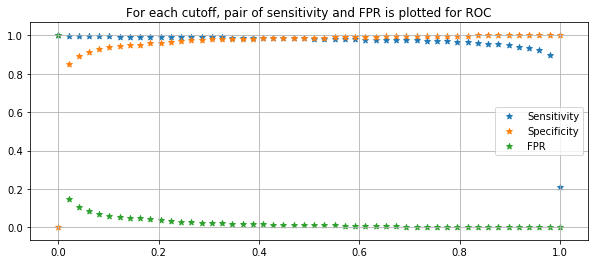

In [476]:
plt.subplots(figsize=(10,4))
plt.scatter(roc_like_df['cutoff'], roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(roc_like_df['cutoff'], 1-roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

In [477]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,total
0,0.428571,0.986307,0.984523,1.97083


# Model Validation

Coefficient Stability - sign and p-values

In [478]:
##1. Checking the coefficient stability on validation sample
logreg_test = sm.logit(formula='CHURNED ~ ' + "+".join(train_features), data=test_X)
result_test = logreg_test.fit()
summ_test = result_test.summary()
summ_test

         Current function value: 0.049722
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                CHURNED   No. Observations:                 4737
Model:                          Logit   Df Residuals:                     4712
Method:                           MLE   Df Model:                           24
Date:                Mon, 10 Sep 2018   Pseudo R-squ.:                  0.9283
Time:                        19:58:38   Log-Likelihood:                -235.53
converged:                      False   LL-Null:                       -3282.7
                                        LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   34.5145   4881.692      0.007      0.994   -9533.427    9602.456
AGE                                          0.0464      0.009      4.939      0.000       0.028       0.065
DAYS_BETWEEN_FIRST_COMM_AND_UPGRADE_DATE    -2.9497      0.198    -14.862      0.000      -3.339      -2.561
channel_low_churn                           -4.5432      1.049     -4.330      0.000      -6.599      -2.487
comp_owner_N                                -0.6135      0.288     -2.127      0.033      -1.179      -0.048
comp_owner_Y                                 1.4209      0.364      3.906      0.000       0.708       2.134
feedback_GOOD                               -0.6626      0.278     -2.383      0.017      -1.208      -0.118
feedback_Missing                            -0.7830      0.349     -2.244      0.025      -1.467      -0.099
model_low                                   -5.5785      1.234     -4.520      0.000      -7.998      -3.159
model_medium                                -1.1631      0.276     -4.222      0.000      -1.703      -0.623
plan_low                                    -1.8350      0.357     -5.140      0.000      -2.535      -1.135
plan_medium                                 -1.1361      0.324     -3.508      0.000      -1.771      -0.501
plan_zero                                  -30.1918    2.8e+05     -0.000      1.000   -5.49e+05    5.49e+05
recent_channel_medium_churn_channel          1.1163      0.292      3.820      0.000       0.544       1.689
satellite_medium_churn_satellite             0.5769      0.281      2.053      0.040       0.026       1.128
site_Missing                                 4.2786      4.743      0.902      0.367      -5.017      13.575
site_Spaceway                                1.2047      0.271      4.438      0.000       0.673       1.737
source_low_churn                           -22.6351   4881.692     -0.005      0.996   -9590.576    9545.306
source_medium_churn                        -22.4444   4881.692     -0.005      0.996   -9590.385    9545.497
source_zero_churn                          -38.7880   4917.792     -0.008      0.994   -9677.483    9599.907
status_Unknown                              40.9251    7.7e+06   5.32e-06      1.000   -1.51e+07    1.51e+07
warranty_low_churn_warranty                 -3.2045      0.664     -4.825      0.000      -4.506      -1.903
warranty_medium_churn_warranty              -1.0503      0.969     -1.083      0.279      -2.950       0.850
zip_low_churn_zip                           -3.1190      0.465     -6.706      0.000      -4.031      -2.207
zip_medium_churn_zip                        -0.6656      0.306     -2.172      0.030      -1.266      -0.065
============================================================================================================

Possibly complete quasi-separation: A fraction 0.60 of observations can be
perf

Gini Metric Comparison

In [479]:
train_gini = 2*metrics.roc_auc_score(train_X['CHURNED'], result.predict()) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)
test_gini = 2*metrics.roc_auc_score(test_X['CHURNED'], result.predict(test_X)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.99582743156
The Gini Index for the model built on the Test Data is :  0.994246589607


Cut-Off based sensitivity comparison

      actual      prob
3593       0  0.000048
2273       0  0.001333
8395       1  1.000000
967        0  0.000285
8966       1  1.000000


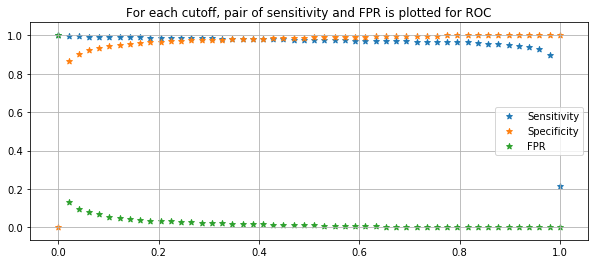

In [480]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test_X))
test_predicted_prob.columns = ['prob']
test_actual = test_X['CHURNED']
# making a DataFrame with actual and prob columns
hr_test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
hr_test_predict.columns = ['actual','prob']
print(hr_test_predict.head(5))

## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
test_roc_like_df = pd.DataFrame()
test_temp = hr_test_predict.copy()

for cut_off in np.linspace(0,1,50):
    test_temp['predicted'] = test_temp['prob'].apply(lambda x: 0 if x < cut_off else 1)
    test_temp['tp'] = test_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==1 else 0, axis=1)
    test_temp['fp'] = test_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==1 else 0, axis=1)
    test_temp['tn'] = test_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==0 else 0, axis=1)
    test_temp['fn'] = test_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==0 else 0, axis=1)
    sensitivity = test_temp['tp'].sum() / (test_temp['tp'].sum() + test_temp['fn'].sum())
    specificity = test_temp['tn'].sum() / (test_temp['tn'].sum() + test_temp['fp'].sum())
    test_roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    test_roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    test_roc_like_df = pd.concat([test_roc_like_df, test_roc_like_table], axis=0)

test_temp.sum()
plt.subplots(figsize=(10,4))
plt.scatter(test_roc_like_df['cutoff'], test_roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(test_roc_like_df['cutoff'], test_roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(test_roc_like_df['cutoff'], 1-test_roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

In [481]:
## Finding ideal cut-off for checking if this remains same in OOS validation
test_roc_like_df['total'] = test_roc_like_df['sensitivity'] + test_roc_like_df['specificity']
test_roc_like_df[test_roc_like_df['total']==test_roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,total
0,0.530612,0.975515,0.990037,1.965553


Confusion Table metrics for the same cut-off

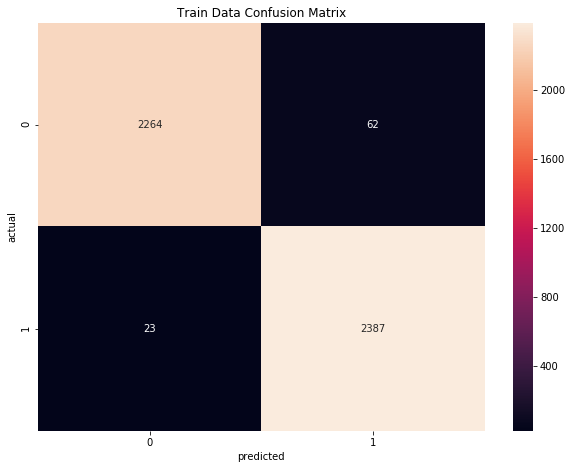

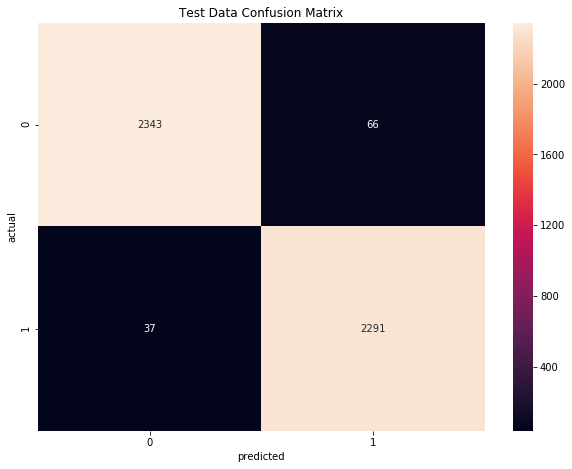

In [482]:
hr_test_predict['predicted'] = hr_test_predict['prob'].apply(lambda x: 1 if x > 0.26 else 0)
telecom_train_predict['predicted'] = telecom_train_predict['prob'].apply(lambda x: 1 if x > 0.26 else 0)
sns.heatmap(pd.crosstab(telecom_train_predict['actual'], telecom_train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(hr_test_predict['actual'], hr_test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()


In [483]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(telecom_train_predict.actual, telecom_train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(hr_test_predict.actual, hr_test_predict.predicted))

The overall accuracy score for the Train Data is :  0.982052364865
The overall accuracy score for the Test Data  is :  0.978256280346


Accuracy with respect to interpretation as probablity score

In [484]:
print(telecom_train_predict[['actual', 'prob']].sum(axis=0))
print(hr_test_predict[['actual', 'prob']].sum(axis=0))  
## not a major problem with accuracy at test overall level

actual    2410.0
prob      2410.0
dtype: float64
actual    2328.000000
prob      2317.246721
dtype: float64


Exporting cleaned dataset data_cust to csv file

In [486]:
data_cust.to_csv('Telecom_Data.csv')

In [487]:
data_cust_2.to_csv('Telecom_Data_2.csv')